In [53]:
import pickle
import pandas as pd
import numpy as np

import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
import re
import string
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation

# logging (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import seaborn as sns

# Reading in data

In [108]:
# main df
df = pd.read_pickle('data_for_vectorization')

In [109]:
df.head()

,names,texts,tokens,tokens_nouns,token_strings,token_nouns_strings
3,Dawn-of-the-Dead,\nDAWN OF\nTHE DEAD\n(The working draft 1977)\...,"[working, draft, george, romero, face, young, ...","[draft, george, romero, face, woman, credit, w...",working draft george romero face young woman a...,draft george romero face woman credit woman fa...
5,Gremlins-2,\n \n \n ...,"[written, charlie, haas, revised, crowded, chi...","[charlie, haas, street, rand, peltzer, mogwai,...",written charlie haas revised crowded chinatown...,charlie haas street rand peltzer mogwai stair ...
6,Mulholland-Drive,\n\n\n\nMulholland Drive Screenplay\n\n\n\n\t\...,"[mulholland, drive, screenplay, u, l, h, l, l,...","[mulholland, drive, screenplay, l, h, l, r, e,...",mulholland drive screenplay u l h l l n r v e ...,mulholland drive screenplay l h l r e l hl r e...
7,What-Lies-Benea,\n\n\n WHAT LIES BENEATH\...,"[clark, gregg, june, moving, murky, hazedark, ...","[clark, gregg, june, hazedark, blue, green, sh...",clark gregg june moving murky hazedark blue gr...,clark gregg june hazedark blue green shaft pur...
8,House-of-1000-Corpses,"\n ""HOUSE OF 1...","[written, r, w, zombie, revised, adancing, aro...","[r, w, zombie, movie, monster, frame, barrel, ...",written r w zombie revised adancing around gra...,r w zombie movie monster frame barrel shotgun ...


In [88]:
# cv vectorized array
with open('/Users/Noah/Github_repos/Project_4/text_cv', 'rb') as file:
    cv_array = pickle.load(file)

#  cv vectorized frame
with open('/Users/Noah/Github_repos/Project_4/cv_df', 'rb') as file:
    cv_df = pickle.load(file)

# cv vectorized array - nouns    
with open('/Users/Noah/Github_repos/Project_4/nouns_cv_array', 'rb') as file:
    nouns_cv_array = pickle.load(file)

#  cv vectorized frame - nouns
with open('/Users/Noah/Github_repos/Project_4/cv_nouns_df', 'rb') as file:
    cv_nouns_df = pickle.load(file)

In [263]:
#  tfidf vectorized array:
with open('/Users/Noah/Github_repos/Project_4/text_tfidf2', 'rb') as file:
    tfidf_array = pickle.load(file)

#tfidf vectorized frame:
with open('/Users/Noah/Github_repos/Project_4/tfidf2_df', 'rb') as file:
    tfidf_df = pickle.load(file)
    
    
#  tfidf vectorized array - nouns:
with open('/Users/Noah/Github_repos/Project_4/tfidf_nouns_array', 'rb') as file:
    tfidf_nouns_array = pickle.load(file)

#tfidf vectorized frame - nouns:
with open('/Users/Noah/Github_repos/Project_4/tfidf_nouns_df', 'rb') as file:
    tfidf_nouns_df = pickle.load(file)

In [99]:
tfidf_array.shape

tfidf_nouns_array.shape

(125, 100000)

In [9]:
cv_df.head()

,aa,aand,aappears,aaron,aat,aback,abandon,abandoned,abbey,abbot,...,zero,zip,zipper,zippo,zoe,zombie,zone,zoo,zoom,zowie
0,1,1,0,0,0,1,0,0,0,0,...,3,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,0,0,0,2,2,0,0,...,2,1,0,0,0,236,1,0,5,0
4,0,2,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,2,0,0,0


# Topic modeling with PCA, LDA, SVD, NMF

We now have to vectorized df's: cv_df and tfidf2_df
Using a pipeline to combine 

## LDA

### pyLDAvis -- DO NOT RUN THIS IN JUPYTER LAB!!

In [ ]:
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(text_tfidf2)

In [ ]:
# Pickling lda_tfidf

filename = 'lda_tfidf'
outfile = open(filename,'wb')
pickle.dump(lda_tfidf,outfile)
outfile.close()

In [ ]:
# import pyLDAvis
# import pyLDAvis.sklearn
# pyLDAvis.enable_notebook()

# pyLDAvis.sklearn.prepare(lda_tfidf, text_tfidf2, tfidf2)

# arg 1 is the same: fit LDA object
# arg 2 is vectorized array tfidf
# arg 3 is fit transformed tfidf vectorizer

In [ ]:
# If running in anoher file

varname = pyLDAvis.sklearn.prepare(lda_tfidf, text_tfidf2, tfidf2)
pyLDAvis.show(varname)

### Gensim

In [17]:
from gensim import corpora
from gensim.corpora import Dictionary, MmCorpus

from gensim.models.ldamodel import LdaModel

In [18]:
texts = [[text for text in doc.split()] for doc in df.token_strings] # bag of all words
dictionary = Dictionary(texts) # dictionary
corpus = [dictionary.doc2bow(doc) for doc in df.tokens]
word_counts = [[(dictionary[id], count) for id, count in line] for line in corpus] # words and their counts

2020-11-04 14:04:56,281 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-11-04 14:04:57,137 : INFO : built Dictionary(69989 unique tokens: ['aa', 'aand', 'aatmakes', 'aback', 'abandonment']...) from 125 documents (total 1379852 corpus positions)


In [ ]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

In [ ]:
# Set training parameters.
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [128]:
print(model.print_topics())

2020-11-05 09:00:12,736 : INFO : topic #0 (0.023): 0.010*"look" + 0.008*"back" + 0.006*"door" + 0.006*"see" + 0.005*"one" + 0.005*"hand" + 0.005*"like" + 0.005*"get" + 0.005*"turn" + 0.004*"eye"
2020-11-05 09:00:12,737 : INFO : topic #1 (0.032): 0.008*"look" + 0.007*"back" + 0.007*"door" + 0.006*"see" + 0.006*"get" + 0.005*"go" + 0.005*"wa" + 0.005*"one" + 0.005*"like" + 0.005*"know"
2020-11-05 09:00:12,739 : INFO : topic #2 (0.011): 0.013*"grant" + 0.007*"ellie" + 0.007*"hammond" + 0.005*"timmy" + 0.005*"lex" + 0.005*"wu" + 0.004*"nedry" + 0.004*"rex" + 0.004*"muldoon" + 0.003*"gennaro"
2020-11-05 09:00:12,740 : INFO : topic #3 (0.013): 0.008*"back" + 0.007*"look" + 0.006*"door" + 0.005*"one" + 0.005*"see" + 0.005*"like" + 0.005*"hand" + 0.004*"get" + 0.004*"turn" + 0.004*"around"
2020-11-05 09:00:12,742 : INFO : topic #4 (0.014): 0.008*"look" + 0.007*"back" + 0.006*"see" + 0.005*"one" + 0.005*"like" + 0.005*"eye" + 0.005*"john" + 0.005*"hand" + 0.004*"wa" + 0.004*"turn"


[(0, '0.010*"look" + 0.008*"back" + 0.006*"door" + 0.006*"see" + 0.005*"one" + 0.005*"hand" + 0.005*"like" + 0.005*"get" + 0.005*"turn" + 0.004*"eye"'), (1, '0.008*"look" + 0.007*"back" + 0.007*"door" + 0.006*"see" + 0.006*"get" + 0.005*"go" + 0.005*"wa" + 0.005*"one" + 0.005*"like" + 0.005*"know"'), (2, '0.013*"grant" + 0.007*"ellie" + 0.007*"hammond" + 0.005*"timmy" + 0.005*"lex" + 0.005*"wu" + 0.004*"nedry" + 0.004*"rex" + 0.004*"muldoon" + 0.003*"gennaro"'), (3, '0.008*"back" + 0.007*"look" + 0.006*"door" + 0.005*"one" + 0.005*"see" + 0.005*"like" + 0.005*"hand" + 0.004*"get" + 0.004*"turn" + 0.004*"around"'), (4, '0.008*"look" + 0.007*"back" + 0.006*"see" + 0.005*"one" + 0.005*"like" + 0.005*"eye" + 0.005*"john" + 0.005*"hand" + 0.004*"wa" + 0.004*"turn"')]


In [ ]:
# example for first script in topic
list(model.get_document_topics(bow=corpus)[:23])

## SVD

Trying different numbers of features

In [400]:
svd_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100)
svd_matrix = svd_model.fit_transform(tfidf2_array)

In [377]:
# individual words

(svd_model.components_).shape

(3, 100000)

In [401]:
# explained variance: 3 features

print('Cumulative explained variation for 3 principal components: {}'.format(np.sum(svd_model.explained_variance_ratio_)))


Cumulative explained variation for 3 principal components: 0.17734702704278432


In [403]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100)
svd_matrix = svd_model.fit_transform(tfidf2_array)

In [406]:
# explained variance: 20 features

print('Cumulative explained variation for 20 principal components: {}'.format(np.sum(svd_model.explained_variance_ratio_)))

Cumulative explained variation for 20 principal components: 0.1773467674469879


In [407]:
svd_model = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=100)
svd_matrix = svd_model.fit_transform(tfidf2_array)

In [408]:
# explained variance: 100 features

print('Cumulative explained variation for 100 principal components: {}'.format(np.sum(svd_model.explained_variance_ratio_)))

Cumulative explained variation for 100 principal components: 0.816369623642605


So, in order to actually explain the variance, we need many more features. 

word-component df

### 3 feature model

In [378]:
svd_word_component_df = pd.DataFrame(svd_model.components_, index = ['Topic_1', 'Topic_2', 'Topic_3'], 
                                     columns = tfidf_df.columns).transpose()

svd_word_component_df.sort_values(by = 'Topic_2', ascending = False)

,Topic_1,Topic_2,Topic_3
gave em,0.008080,0.025416,-0.006694
scared decides,0.009422,0.024855,-0.003788
scared determined,0.009260,0.024144,-0.003794
horror pull,0.008778,0.022899,-0.004215
finish typing,0.009998,0.022652,-0.006847
...,...,...,...
bed furniture,0.009632,-0.018455,0.001743
car begin,0.009503,-0.018990,-0.008616
devil hell,0.008301,-0.019991,0.000721
los angeles,0.013147,-0.020388,-0.001157


Document-component df

In [384]:
svd_doc_component_df = pd.DataFrame(svd_matrix, index = df.names, columns = ['Topic_1', 'Topic_2', 'Topic_3'])
svd_doc_component_df.head()

,Topic_1,Topic_2,Topic_3
names,,,
Dawn-of-the-Dead,0.290489,-0.085208,-0.020400
Gremlins-2,0.271910,-0.127025,-0.225176
Mulholland-Drive,0.273129,0.011428,0.111707
What-Lies-Benea,0.286536,0.130585,0.020618
House-of-1000-Corpses,0.277941,-0.014815,-0.117950


In [385]:
svd_doc_component_df.sort_values(by = 'Topic_1', ascending = False).head(10)

,Topic_1,Topic_2,Topic_3
names,,,
"Prophecy,-The",0.329373,-0.026024,0.022144
"Hills-Have-Eyes,-The",0.323662,0.115061,0.147013
Peeping-To,0.316061,0.085599,-0.145705
"Nightmare-on-Elm-Street,-A",0.313348,0.177114,0.077067
Evil-Dead-II-Dead-by-Dawn,0.312649,-0.072289,-0.070752
Gothika,0.312005,0.014000,-0.004611
Predator,0.310839,0.175061,-0.051395
Feas,0.309944,0.145441,-0.002740
Jurassic-Park,0.309462,0.167648,-0.055698


Plotting

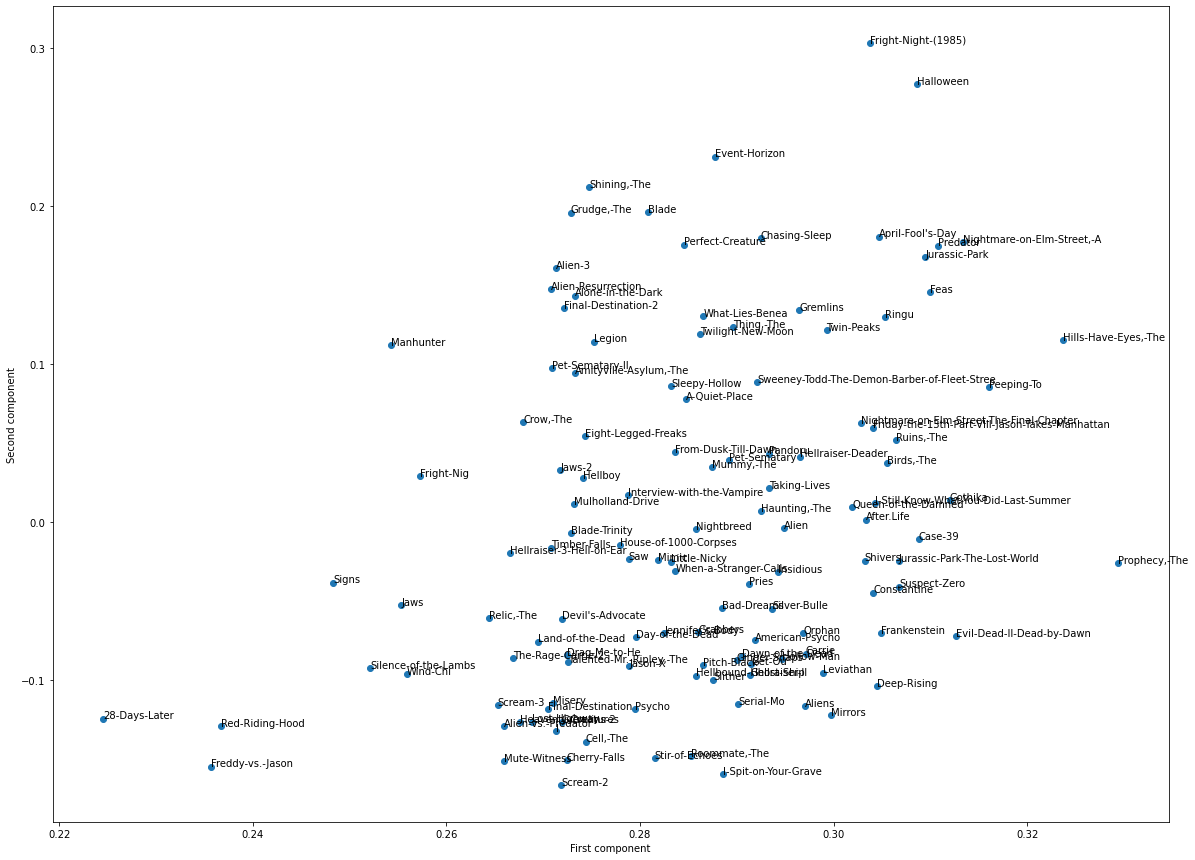

In [395]:
# first second and third features

plt.figure(figsize = [20, 15])
plt.scatter(svd_doc_component_df['Topic_1'], svd_doc_component_df['Topic_2'], label = True)
# plt.xlim(0.2, 0.35)
# plt.ylim(-0.3, 0.4)
plt.xlabel('First component')
plt.ylabel('Second component')

for i in range(svd_doc_component_df.shape[0]):
    plt.text(svd_doc_component_df.iloc[i,0], svd_doc_component_df.iloc[i,1], str(svd_doc_component_df.index[i]))

In [ ]:
# possible features: ? (x axis) by techy/scifi (y axis)

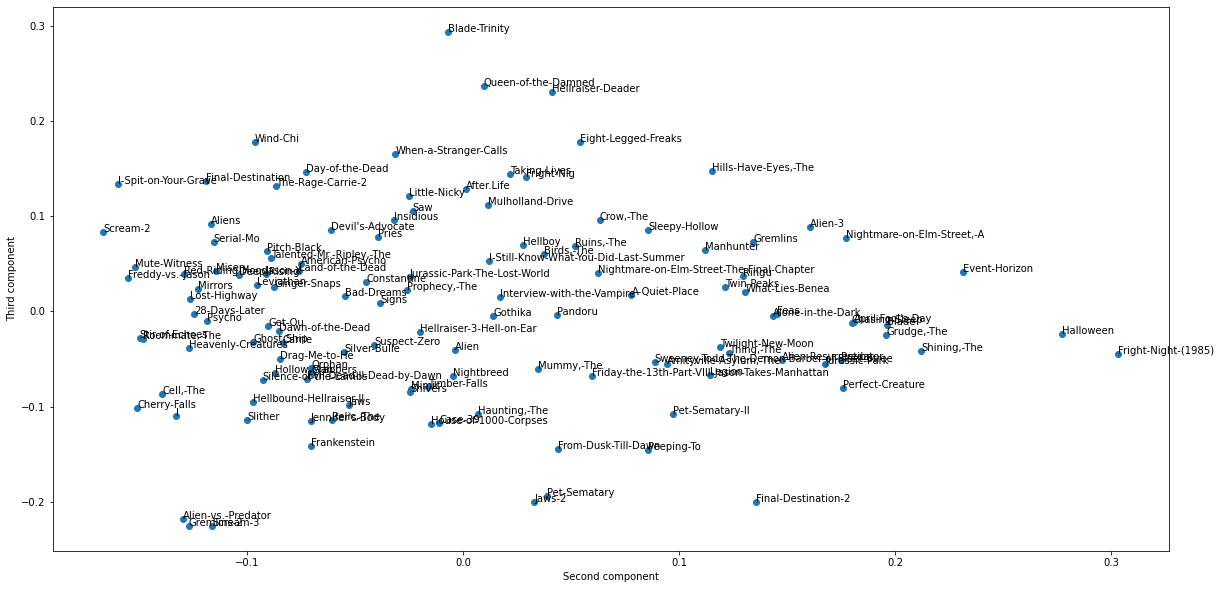

In [393]:
# second and third features

plt.figure(figsize = [20, 10])
plt.scatter(svd_doc_component_df['Topic_2'], svd_doc_component_df['Topic_3'], label = True)
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0.5, 0.5)
plt.xlabel('Second component')
plt.ylabel('Third component')

for i in range(svd_doc_component_df.shape[0]):
    plt.text(svd_doc_component_df.iloc[i,1], svd_doc_component_df.iloc[i,2], str(svd_doc_component_df.index[i]))

In [ ]:
# first and third features

plt.figure(figsize = [20, 15])
plt.scatter(svd_doc_component_df['Topic_1'], svd_doc_component_df['Topic_3'], label = True)
plt.xlim(0.2, 0.35)
plt.ylim(-0.5, 0.5)
plt.xlabel('First component')
plt.ylabel('Third component')

for i in range(svd_doc_component_df.shape[0]):
    plt.text(svd_doc_component_df.iloc[i,0], svd_doc_component_df.iloc[i,2], str(svd_doc_component_df.index[i]))

### Functions for getting top docs and words

In [79]:

# Get top docs for each topic
def top_docs(svd_doc_component_df, topic, n_docs):
    return list(svd_doc_component_df
           .sort_values(by = topic, ascending = False)
           .head(n_docs).index.values)



# Get top word for each topic
def top_words(svd_word_component_df, topic, n_words):
    return (svd_word_component_df
           .sort_values(by = topic, ascending = False)
           .head(n_words))[topic].index.values # only want the words themselves


In [394]:
top_docs(svd_doc_component_df, 'Topic_3', 20)

['Blade-Trinity',
 'Queen-of-the-Damned',
 'Hellraiser-Deader',
 'Wind-Chi',
 'Eight-Legged-Freaks',
 'When-a-Stranger-Calls',
 'Hills-Have-Eyes,-The',
 'Day-of-the-Dead',
 'Taking-Lives',
 'Fright-Nig',
 'Final-Destination',
 'I-Spit-on-Your-Grave',
 'The-Rage-Carrie-2',
 'After.Life',
 'Little-Nicky',
 'Mulholland-Drive',
 'Saw',
 'Crow,-The',
 'Insidious',
 'Aliens']

In [317]:
print('topic 1: {}\n'.format(top_words(svd_word_component_df, 'Topic_1', 10)))

print('topic 2: {}\n'.format(top_words(svd_word_component_df, 'Topic_2', 10)))

print('topic 3: {}'.format(top_words(svd_word_component_df, 'Topic_3', 10)))


topic 1: ['maybe' 'new' 'lost' 'past' 'year' 'said' 'saw' 'really' 'change'
 'taking']

topic 2: ['genre action' 'sci' 'sci fi' 'horror sci' 'fi' 'action horror' 'seal'
 'fi thriller' 'cargo' 'hull']

topic 3: ['torment' 'shall' 'beautifully' 'suffering' 'candlelight' 'pity'
 'stone wall' 'glittering' 'bowed' 'girl stare']


### Nouns

In [264]:
svd_model_nouns = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100)
svd_nouns_matrix = svd_model_nouns.fit_transform(tfidf_nouns_array)

(svd_model_nouns.components_).shape

(3, 100000)

In [341]:
svd_nouns_matrix[:10]

array([[ 0.23766928,  0.11501421, -0.14906142],
       [ 0.22944581,  0.01357818,  0.00422687],
       [ 0.23571507, -0.13900985, -0.0940363 ],
       [ 0.2246884 , -0.09625342, -0.04143273],
       [ 0.25989536, -0.07635892,  0.16977157],
       [ 0.22044577, -0.11857279, -0.23629707],
       [ 0.22370535,  0.09904731,  0.07838042],
       [ 0.2495065 , -0.02716939,  0.12467748],
       [ 0.22664877,  0.01825833,  0.11018329],
       [ 0.26933525, -0.00413574,  0.0366129 ]])

Word-component df

In [265]:
svd_word_component_nouns_df = pd.DataFrame(svd_model_nouns.components_, index = ['Topic_1', 'Topic_2', 'Topic_3'], columns = tfidf_nouns_df.columns).transpose()

svd_word_component_nouns_df.head()

,Topic_1,Topic_2,Topic_3
aa,0.011391,0.006070,0.003485
aaaah,0.002308,-0.000917,0.005880
aah,0.001568,-0.001532,-0.002353
aand,0.009663,-0.005383,-0.003419
aand turn,0.004872,-0.002981,0.007903


In [305]:
top_words(svd_word_component_nouns_df, 'Topic_3', 10)

array(['young teacher', 'casting', 'device saw', 'disbelievingly',
       'cell looking', 'decomposing dead', 'believe kid', 'come beat',
       'card man', 'coughing gasping'], dtype=object)

Doc-component df

In [266]:
svd_doc_component_nouns_df = pd.DataFrame(svd_nouns_matrix, index = df.names, columns = ['Topic_1', 'Topic_2', 'Topic_3'])
svd_doc_component_nouns_df.head()

,Topic_1,Topic_2,Topic_3
names,,,
Dawn-of-the-Dead,0.237669,0.115014,-0.149061
Gremlins-2,0.229446,0.013578,0.004227
Mulholland-Drive,0.235715,-0.139010,-0.094036
What-Lies-Benea,0.224688,-0.096253,-0.041433
House-of-1000-Corpses,0.259895,-0.076359,0.169772


Visualizing top words - nouns

In [320]:
print('Nouns\n')
print('topic 1: {}\n'.format(top_words(svd_word_component_nouns_df, 'Topic_1', 20)))

print('topic 2: {}\n'.format(top_words(svd_word_component_nouns_df, 'Topic_2', 20)))

print('topic 3: {}'.format(top_words(svd_word_component_nouns_df, 'Topic_3', 20)))


Nouns

topic 1: ['everybody home' 'icebox' 'theshe' 'eye blink' 'weapon hanging'
 'world seen' 'old file' 'discovered' 'yelling lung' 'beautifully dressed'
 'tattoo come' 'imitates' 'attacking' 'fluttering' 'door puzzled'
 'water hears' 'ax wall' 'yeah nice' 'told thing' 'tot']

topic 2: ['discovering' 'swear god' 'absent' 'face mind' 'body work' 'eye playing'
 'swivelling' 'kiss good' 'electric chair' 'fucking truck' 'floor group'
 'burn finger' 'button shirt' 'swear going' 'discombobulated' 'foot jump'
 'tilling' 'chalkboard' 'wall car' 'table talking']

topic 3: ['young teacher' 'casting' 'device saw' 'disbelievingly' 'cell looking'
 'decomposing dead' 'believe kid' 'come beat' 'card man'
 'coughing gasping' 'freshon' 'bed shaking' 'wanted want' 'fresh grave'
 'wait leave' 'buy cup' 'thisis' 'god secret' 'camera black'
 'thread needle']


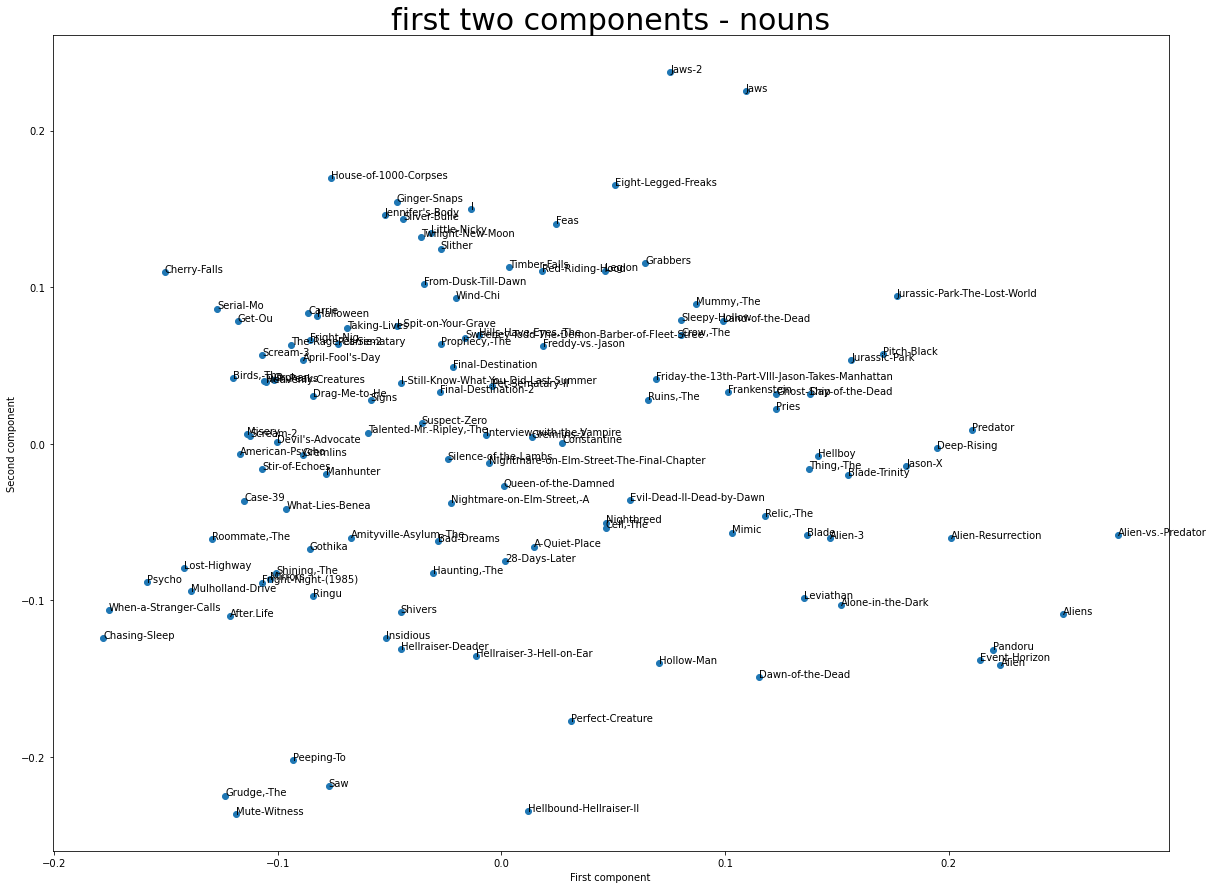

In [326]:
# first two features

plt.figure(figsize = [20, 15])
plt.scatter(svd_doc_component_nouns_df['Topic_1'], svd_doc_component_nouns_df['Topic_2'], label = True)
# plt.xlim(0.2, 0.35)
# plt.ylim(-0.3, 0.4)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('first two components - nouns',size=30)
for i in range(svd_doc_component_nouns_df.shape[0]):
    plt.text(svd_doc_component_nouns_df.iloc[i,0], svd_doc_component_nouns_df.iloc[i,1], str(svd_doc_component_nouns_df.index[i]))

## NMF

In [182]:
nmf_model = NMF(3)
nmf_matrix = nmf_model.fit_transform(text_tfidf2)


### Word component matrix

In [186]:
# pd.DataFrame(nmf_matrix, index = df.names)
nmf_word_component_df = pd.DataFrame(nmf_model.components_, index = ['C1', 'C2', 'C3'], columns = tfidf2_df.columns).transpose()

,C1,C2,C3
aa,0.013091,0.015261,0.004290
aaaah,0.003732,0.000410,0.000000
aah,0.003492,0.000788,0.000223
aand,0.014887,0.009968,0.000000
aand turn,0.003246,0.000822,0.000397
...,...,...,...
zoom,0.010022,0.010941,0.000969
zoom close,0.001599,0.002265,0.000000
zoom right,0.001520,0.002249,0.000696
zooming,0.001785,0.004497,0.000015


### Document component matrix

In [269]:
nmf_doc_component_df = pd.DataFrame(nmf_matrix, index = df.names, columns = ['Topic_1', 'Topic_2', 'Topic_3'])

nmf_doc_component_df.head()

,Topic_1,Topic_2,Topic_3
names,,,
Hellraiser-Hellseeker,0.188044,0.002789,0.004022
Screa,0.000000,0.000000,0.697745
Lord-of-Illusions,0.106688,0.104574,0.003910
Dawn-of-the-Dead,0.000000,0.279395,0.007378
Gremlins-2,0.118555,0.086063,0.017757


In [184]:
### as pipeline

# text = df.token_strings

# nmf_model = NMF(2)
# nmf_transformer = Pipeline([('tfidf', tfidf2), ('nmf', nmf_model)])
# # doc_topic = nmf_model.fit_transform(text)
# nmf_matrix = nmf_transformer.fit_transform(text)

# nmf_matrix.shape

# nmf_df = pd.DataFrame(nmf_matrix, index = df.names)

# nmf_df.head()

In [ ]:
plt.figure(figsize = [10, 40])
plt.scatter(nmf_doc_component_df['Topic_1'], nmf_doc_component_df['Topic_2'], label = True)
plt.xlabel('First component')
plt.ylabel('Second component')
# plt.xlim(0.2, 0.35)
# plt.ylim(-0.5, 0.5)

for i in range(nmf_df.shape[0]):
    plt.text(nmf_df.iloc[i,0], nmf_df.iloc[i,2], str(nmf_df.index[i]))

## K-means clustering

Run on svd_matrix or nmf_matrix!!

Functions to plot k-means clusters

In [297]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 50
    
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c=color[0], alpha=alpha, s=s)
        
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [342]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster_second_third(X, km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 50
    
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c=color[0], alpha=alpha, s=s)
        
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,1],X[km.labels_==i,2],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][1],km.cluster_centers_[i][2],c = color[i], marker = 'x', s = 100)

In [344]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster_first_third(X, km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 50
    
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c=color[0], alpha=alpha, s=s)
        
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,2],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][2],c = color[i], marker = 'x', s = 100)

SVD matrix plotting - svd_doc_component_df

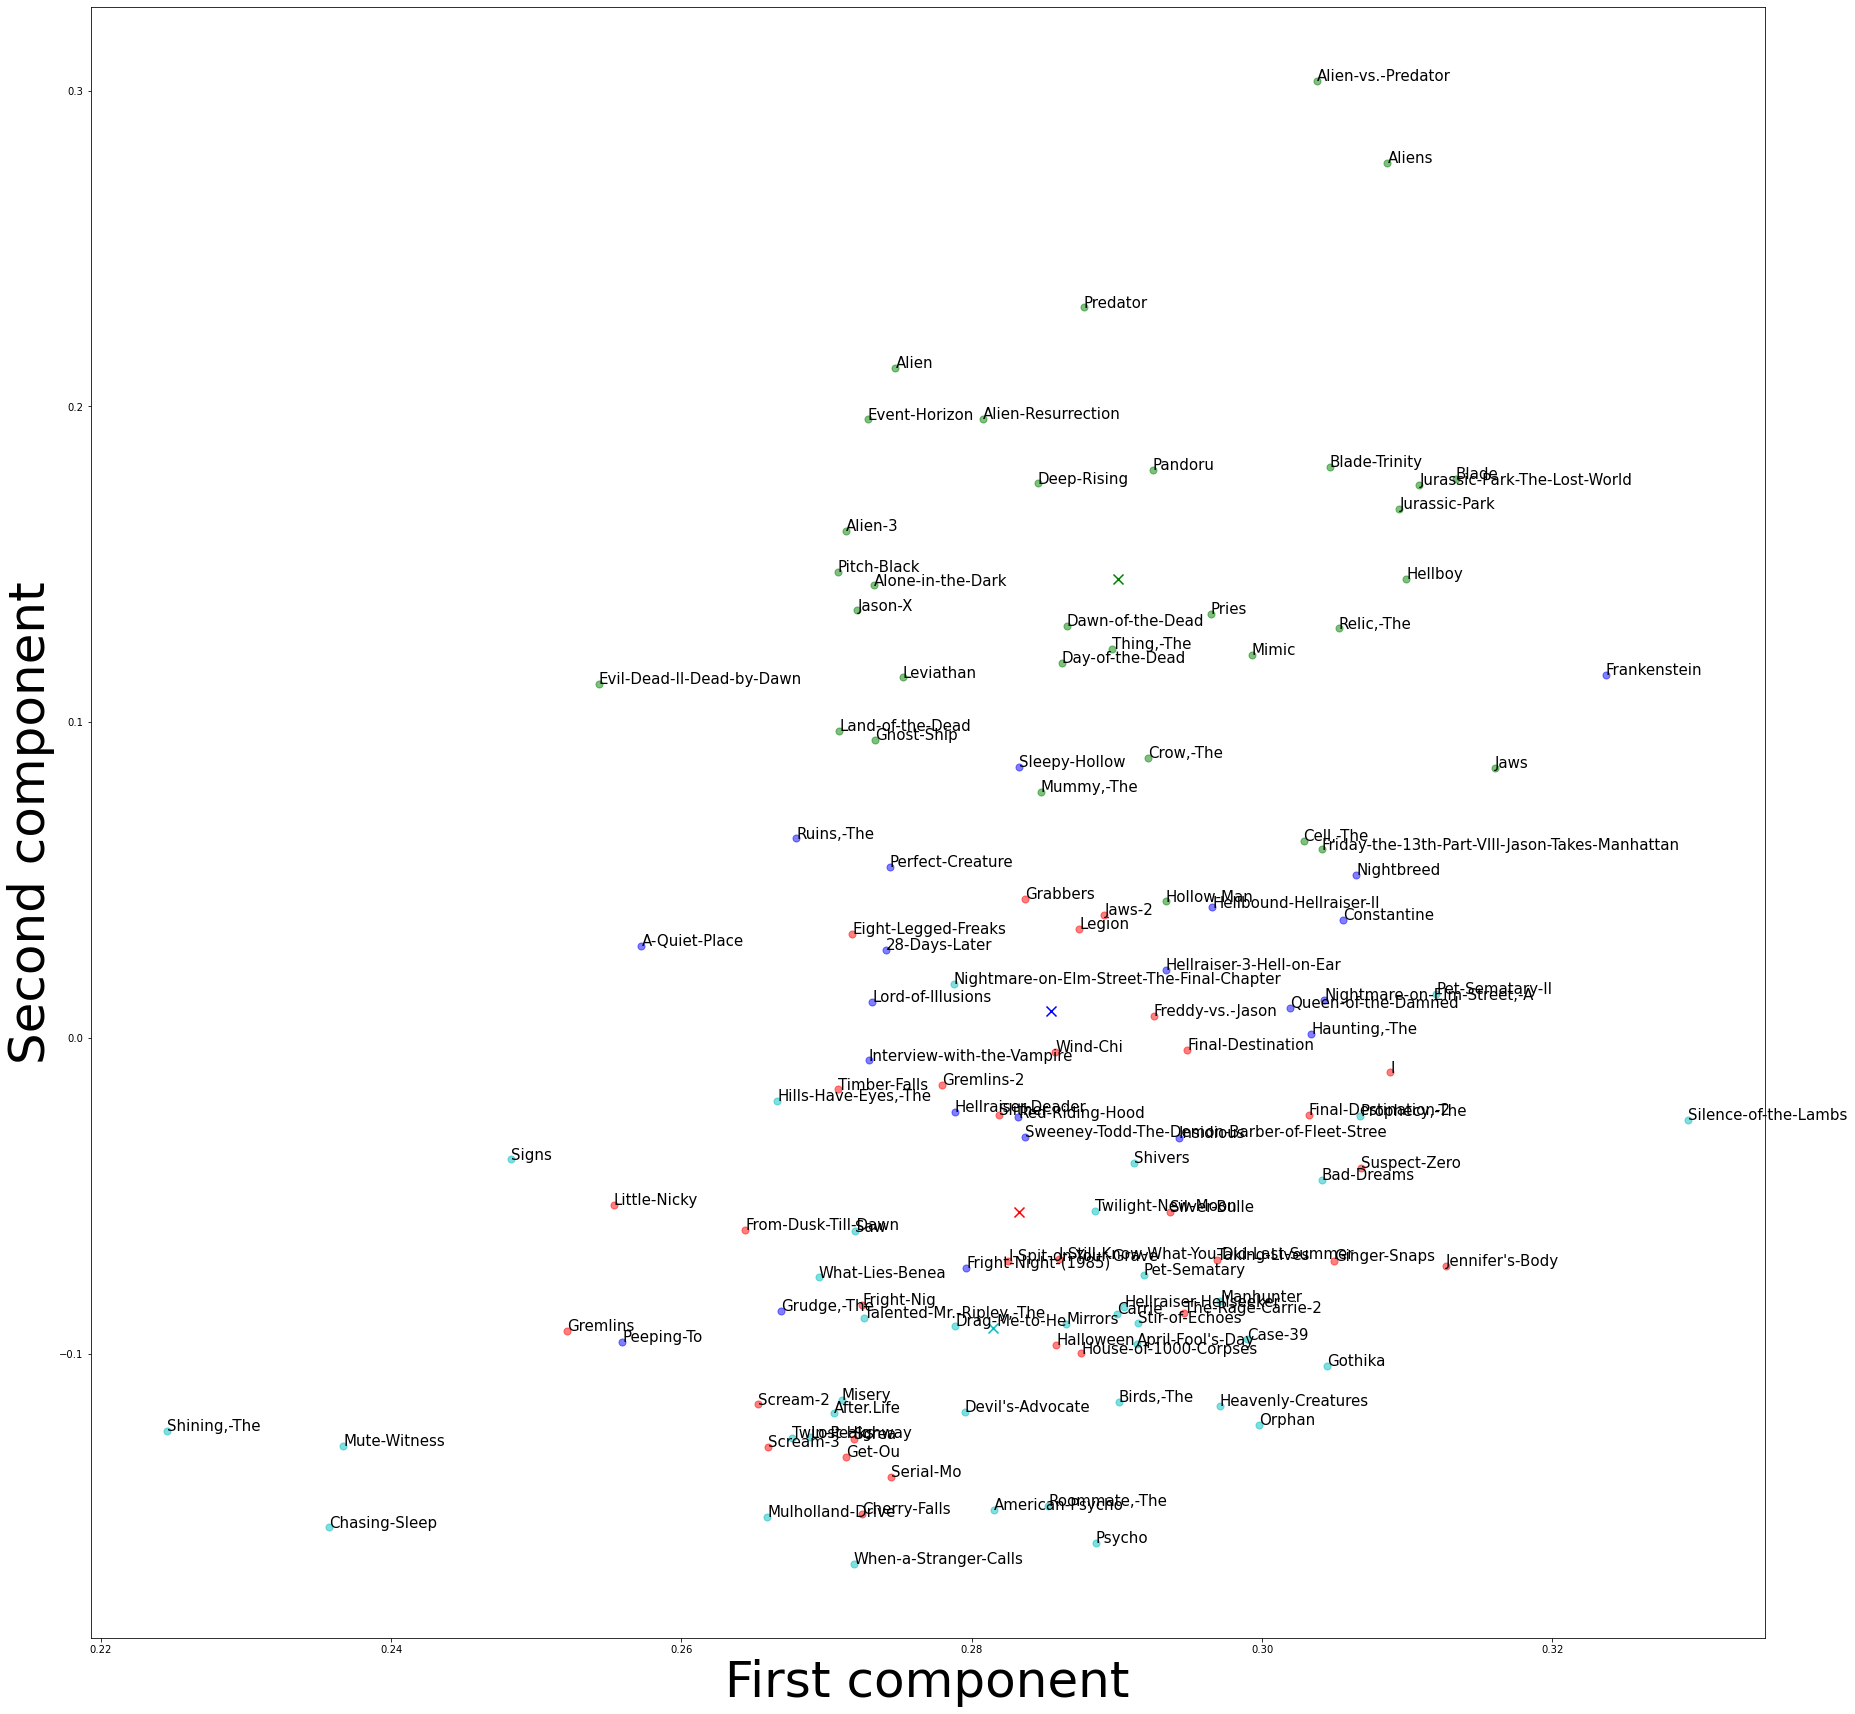

In [312]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(svd_matrix)  # svd_matrix or nmf_matrix

plt.figure(figsize = [30, 30])

display_cluster(svd_matrix,km,num_clusters)
plt.xlabel('First component', size = 30)
plt.ylabel('Second component', size = 30)
plt.title('components 1 and 2: all tokens', size=50)
for i in range(svd_doc_component_df.shape[0]):
    plt.text(svd_doc_component_df.iloc[i,0], svd_doc_component_df.iloc[i,1], str(svd_doc_component_df.index[i]), size = 15)

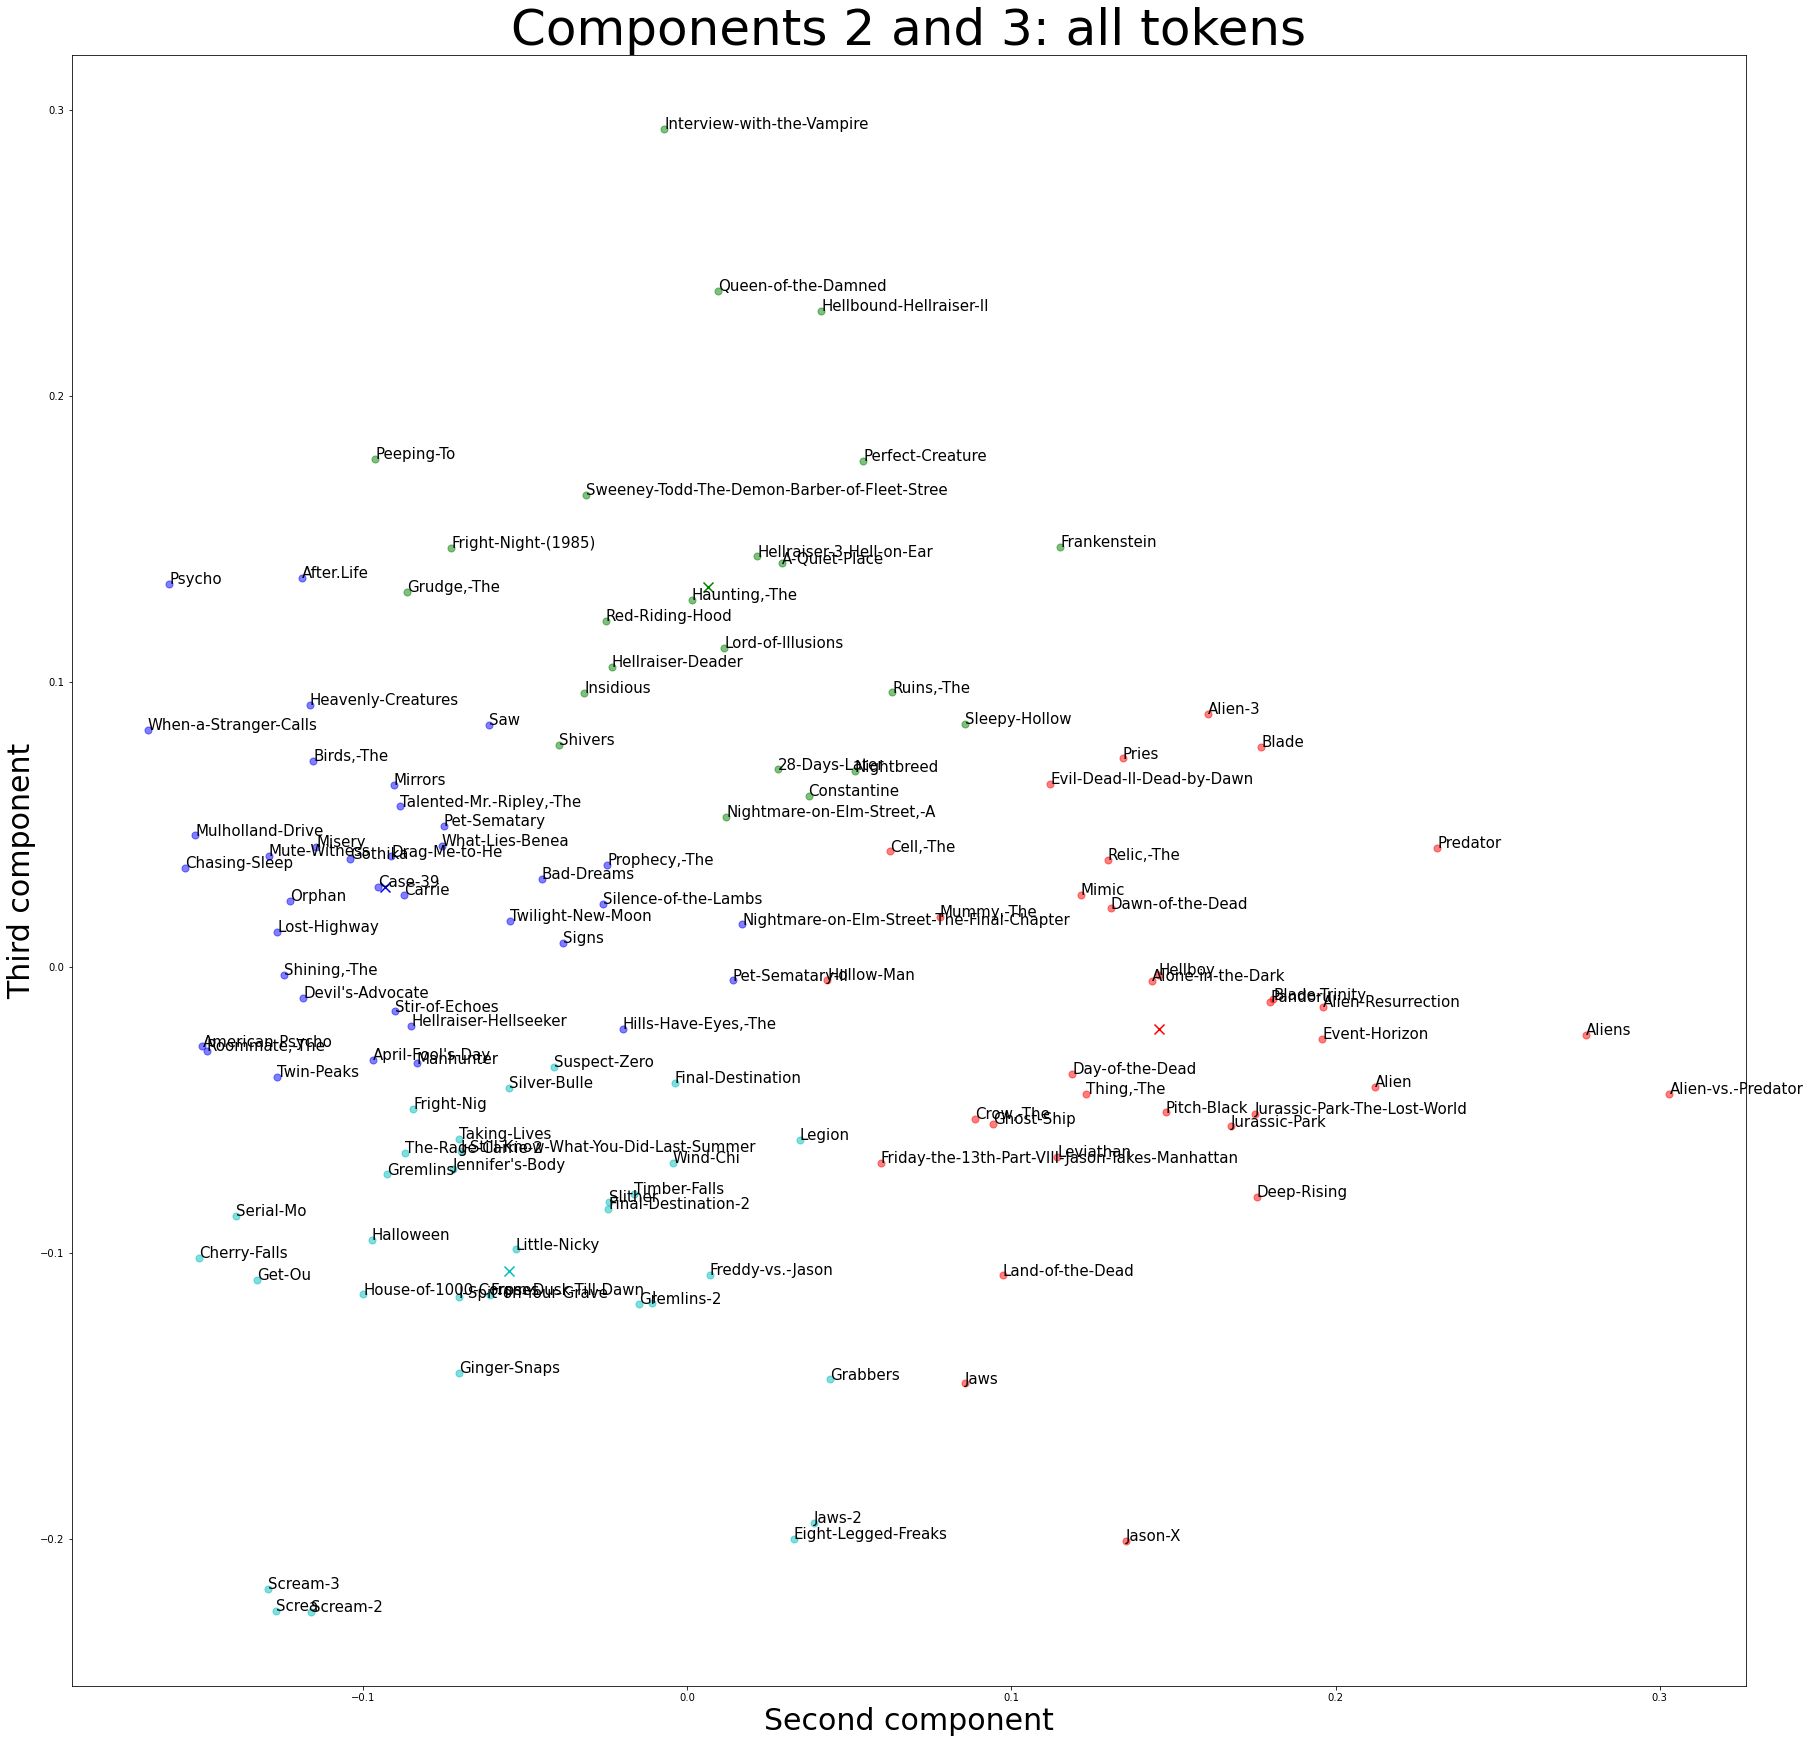

In [351]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(svd_matrix)  # svd_matrix or nmf_matrix

plt.figure(figsize = [30, 30])

display_cluster_second_third(svd_matrix,km,num_clusters)
plt.xlabel('Second component', size = 30)
plt.ylabel('Third component', size = 30)
plt.title('Components 2 and 3: all tokens', size=50)
for i in range(svd_doc_component_df.shape[0]):
    plt.text(svd_doc_component_df.iloc[i,1], svd_doc_component_df.iloc[i,2], str(svd_doc_component_df.index[i]), size = 15)

Second component appears to be "monsteriness"

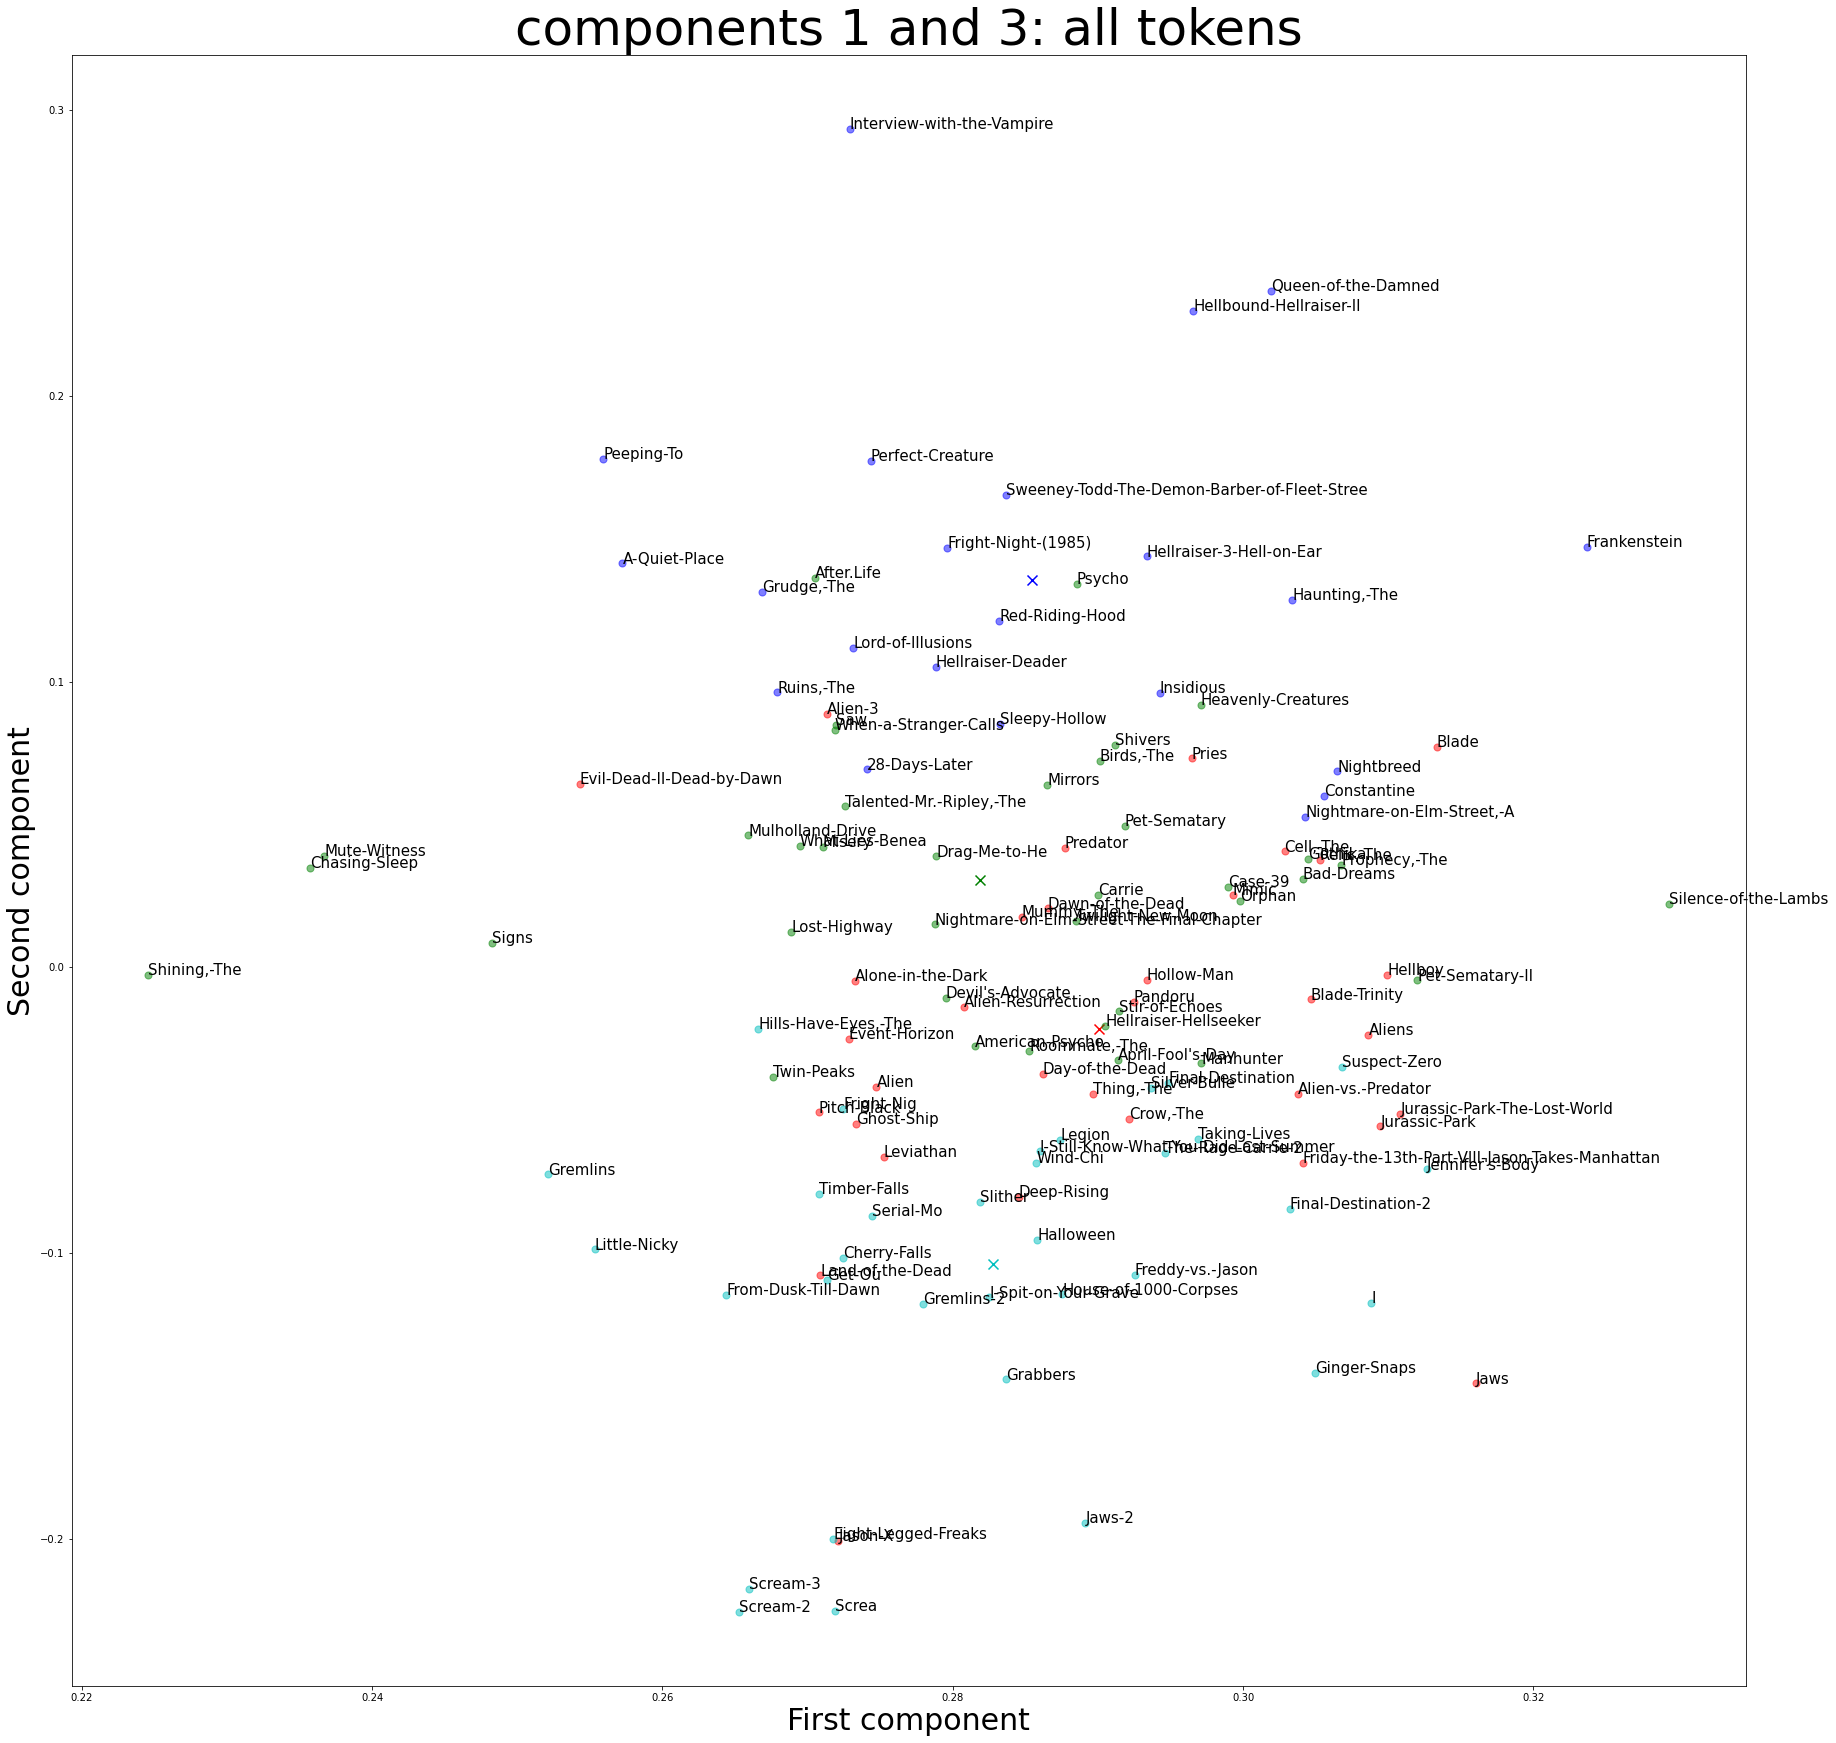

In [352]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(svd_matrix)  # svd_matrix or nmf_matrix

plt.figure(figsize = [30, 30])

display_cluster_first_third(svd_matrix,km,num_clusters)
plt.xlabel('First component', size = 30)
plt.ylabel('Second component', size = 30)
plt.title('components 1 and 3: all tokens', size=50)
for i in range(svd_doc_component_df.shape[0]):
    plt.text(svd_doc_component_df.iloc[i,0], svd_doc_component_df.iloc[i,2], str(svd_doc_component_df.index[i]), size = 15)

In [328]:
print('top words for each components - all tokens\n')
print('topic 1: {}\n'.format(top_words(svd_word_component_df, 'Topic_1', 10)))

print('topic 2: {}\n'.format(top_words(svd_word_component_df, 'Topic_2', 10)))

print('topic 3: {}'.format(top_words(svd_word_component_df, 'Topic_3', 10)))


top words for each components - all tokens

topic 1: ['maybe' 'new' 'lost' 'past' 'year' 'said' 'saw' 'really' 'change'
 'taking']

topic 2: ['genre action' 'sci' 'sci fi' 'horror sci' 'fi' 'action horror' 'seal'
 'fi thriller' 'cargo' 'hull']

topic 3: ['torment' 'shall' 'beautifully' 'suffering' 'candlelight' 'pity'
 'stone wall' 'glittering' 'bowed' 'girl stare']


-----------------------------------------------------------------------------------

For nouns

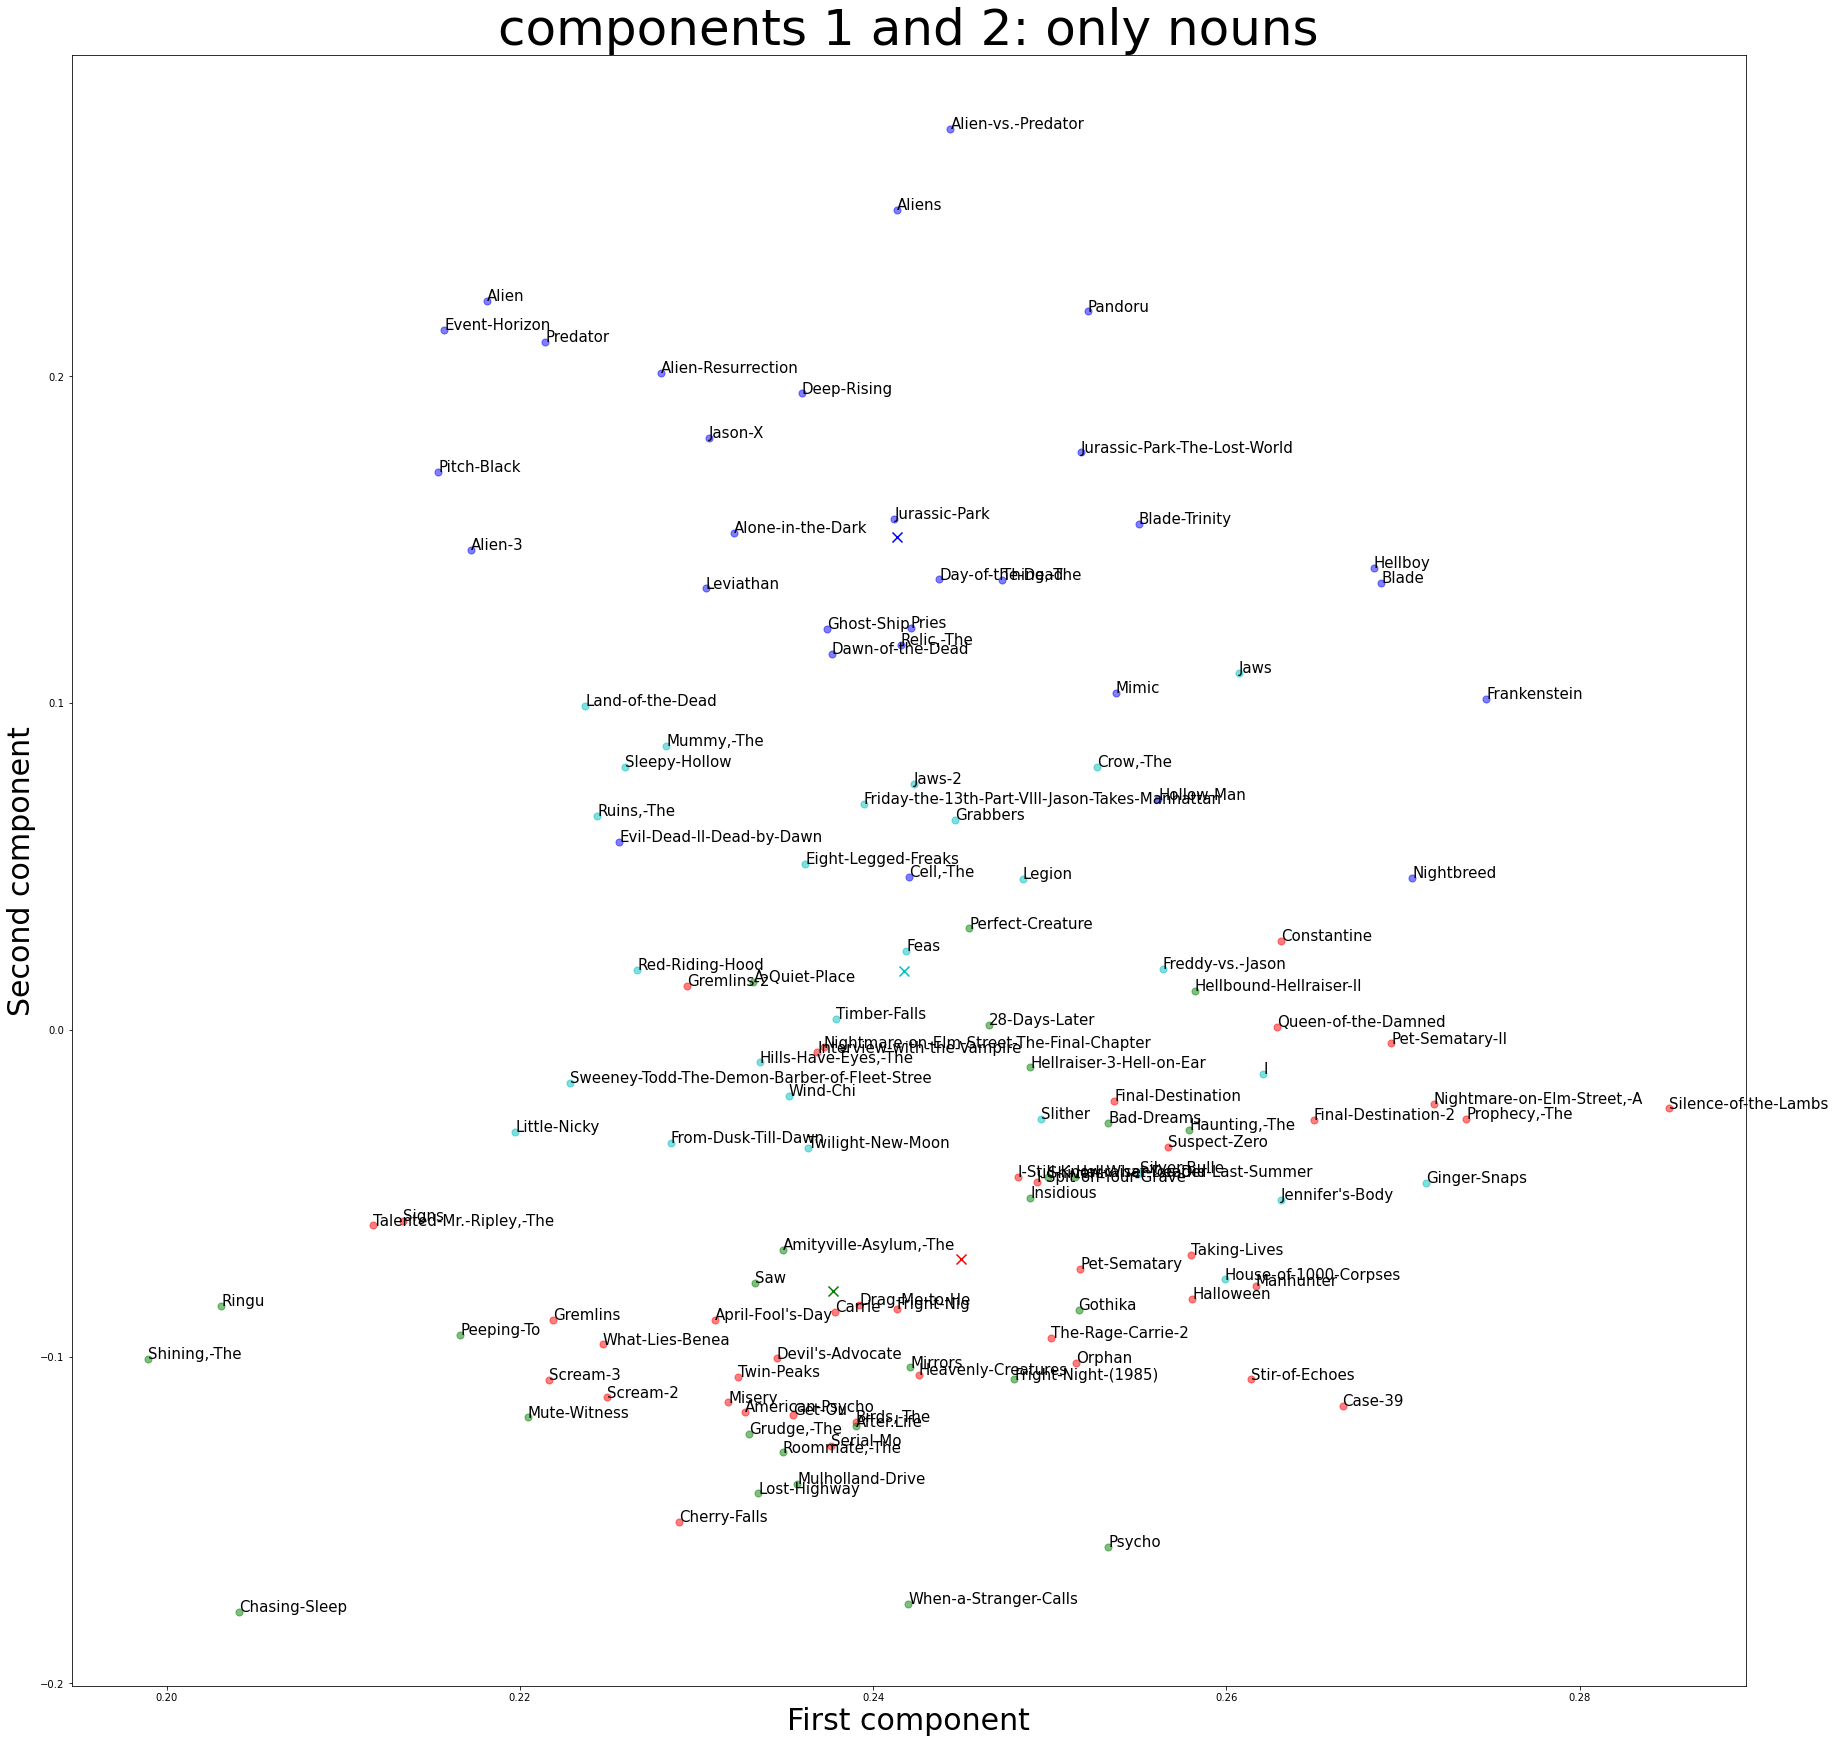

In [325]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(svd_nouns_matrix)  # svd_matrix or nmf_matrix

plt.figure(figsize = [30, 30])

display_cluster(svd_nouns_matrix,km,num_clusters)
plt.xlabel('First component', size = 30)
plt.ylabel('Second component', size = 30)
plt.title('components 1 and 2: only nouns', size=50)
for i in range(svd_doc_component_nouns_df.shape[0]):
    plt.text(svd_doc_component_nouns_df.iloc[i,0], svd_doc_component_nouns_df.iloc[i,1], str(svd_doc_component_nouns_df.index[i]), size = 15)

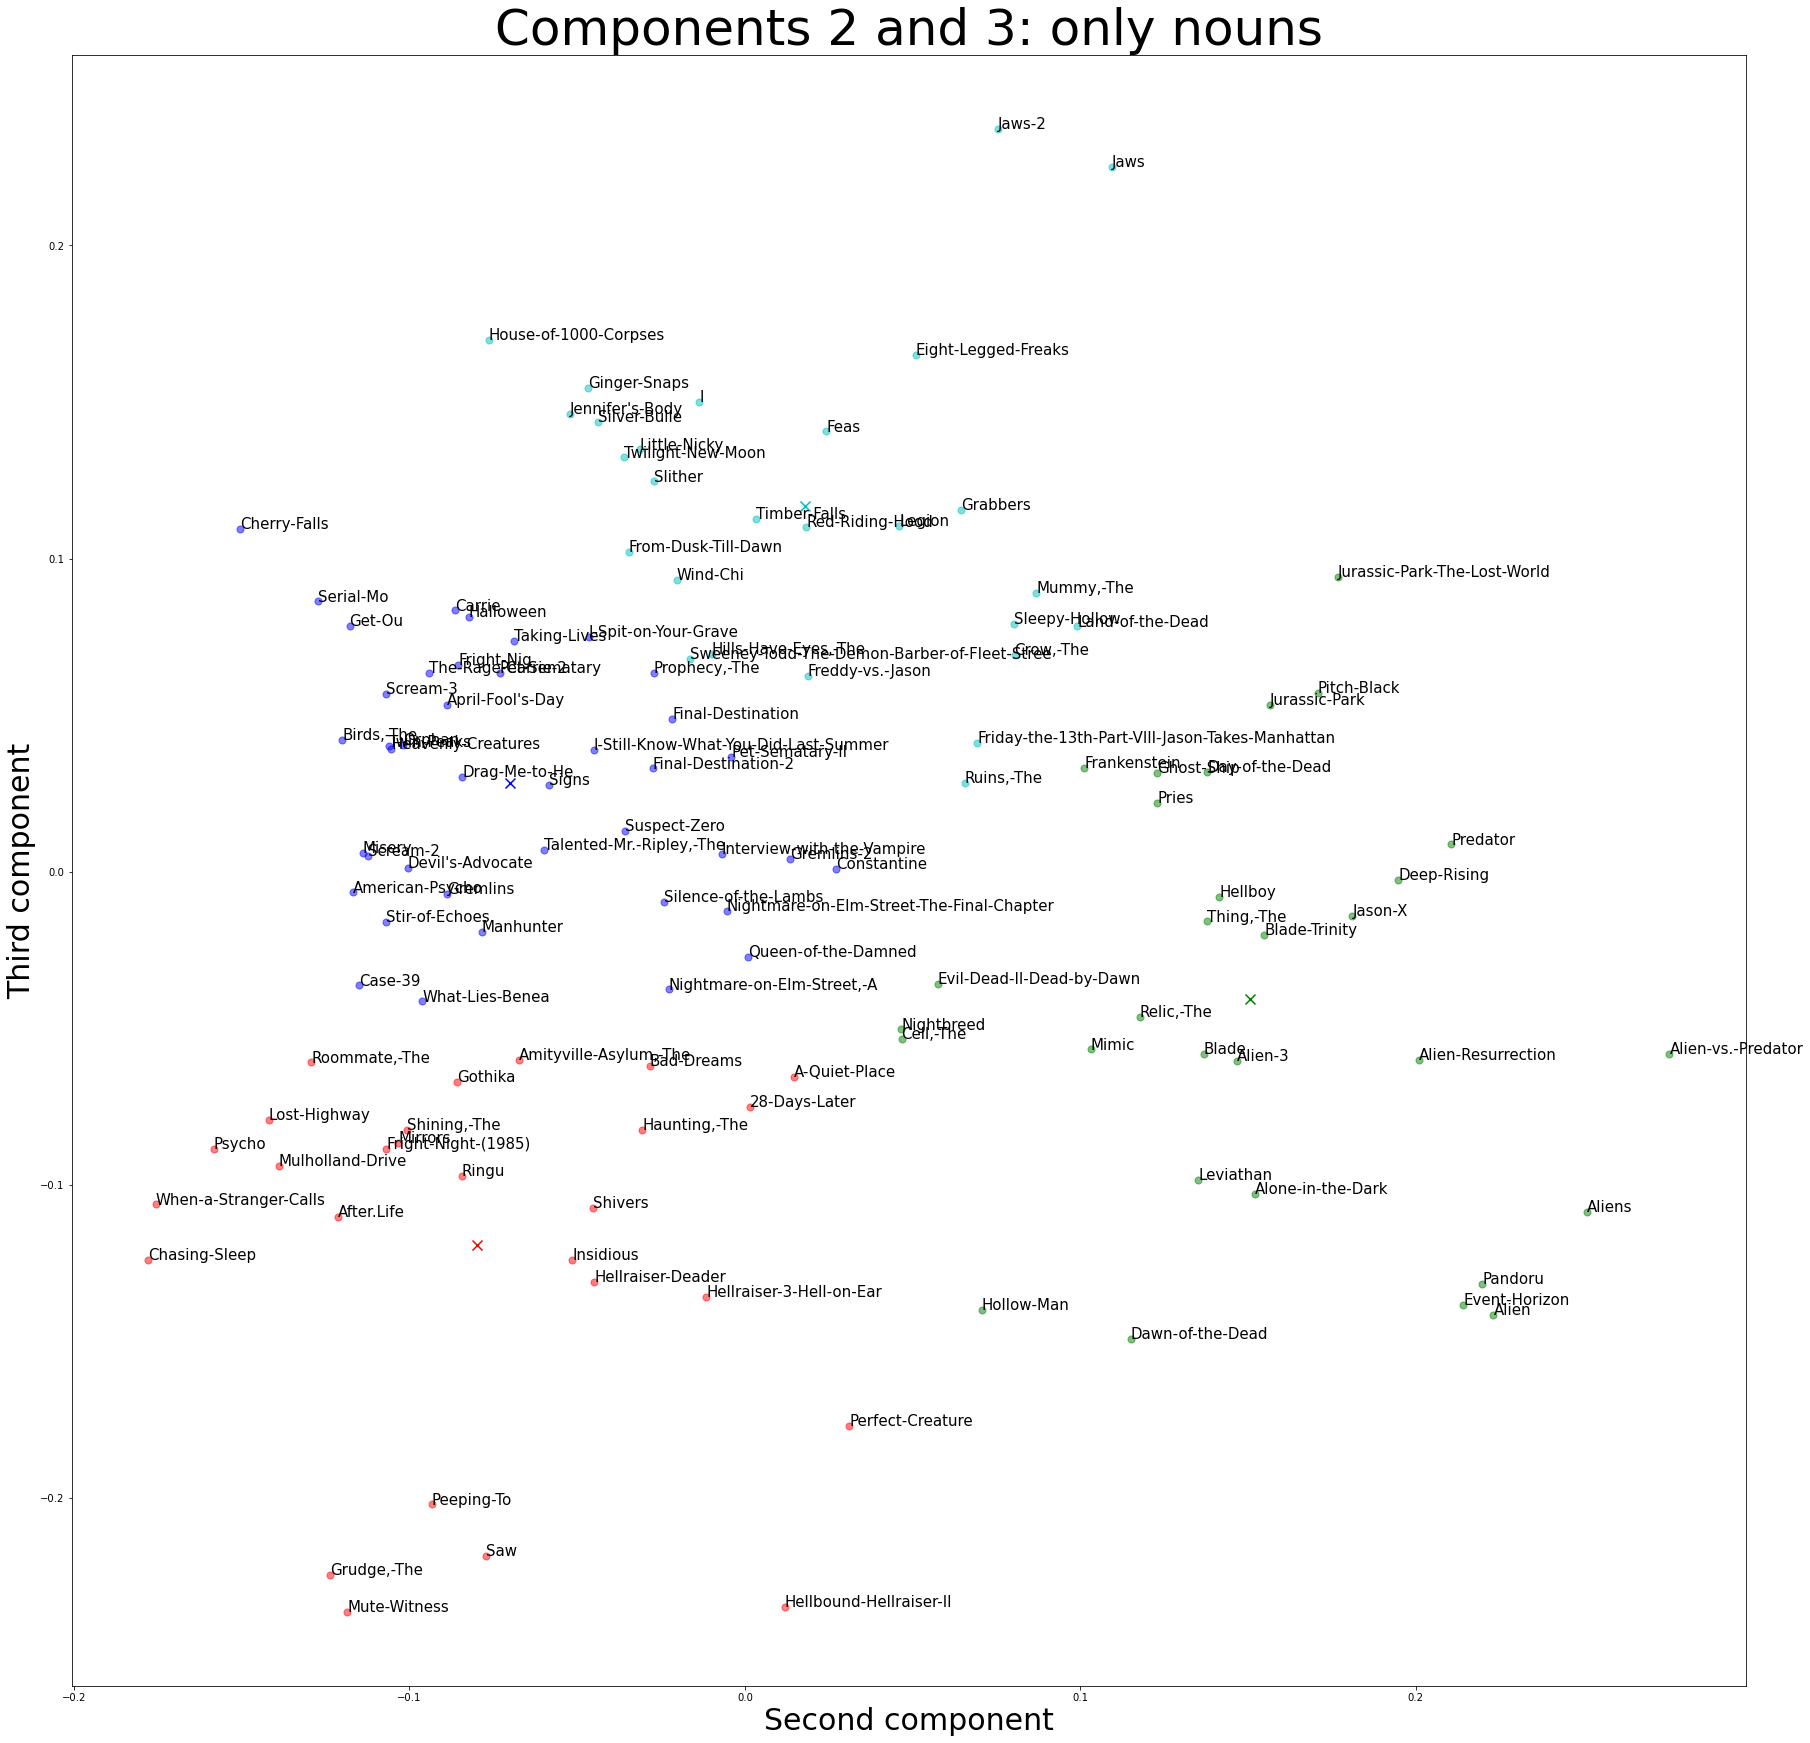

In [346]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(svd_nouns_matrix)  # svd_matrix or nmf_matrix

plt.figure(figsize = [30, 30])

display_cluster_second_third(svd_nouns_matrix,km,num_clusters)
plt.xlabel('Second component', size = 30)
plt.ylabel('Third component', size = 30)
plt.title('Components 2 and 3: only nouns', size=50)
for i in range(svd_doc_component_nouns_df.shape[0]):
    plt.text(svd_doc_component_nouns_df.iloc[i,1], svd_doc_component_nouns_df.iloc[i,2], str(svd_doc_component_nouns_df.index[i]), size = 15)

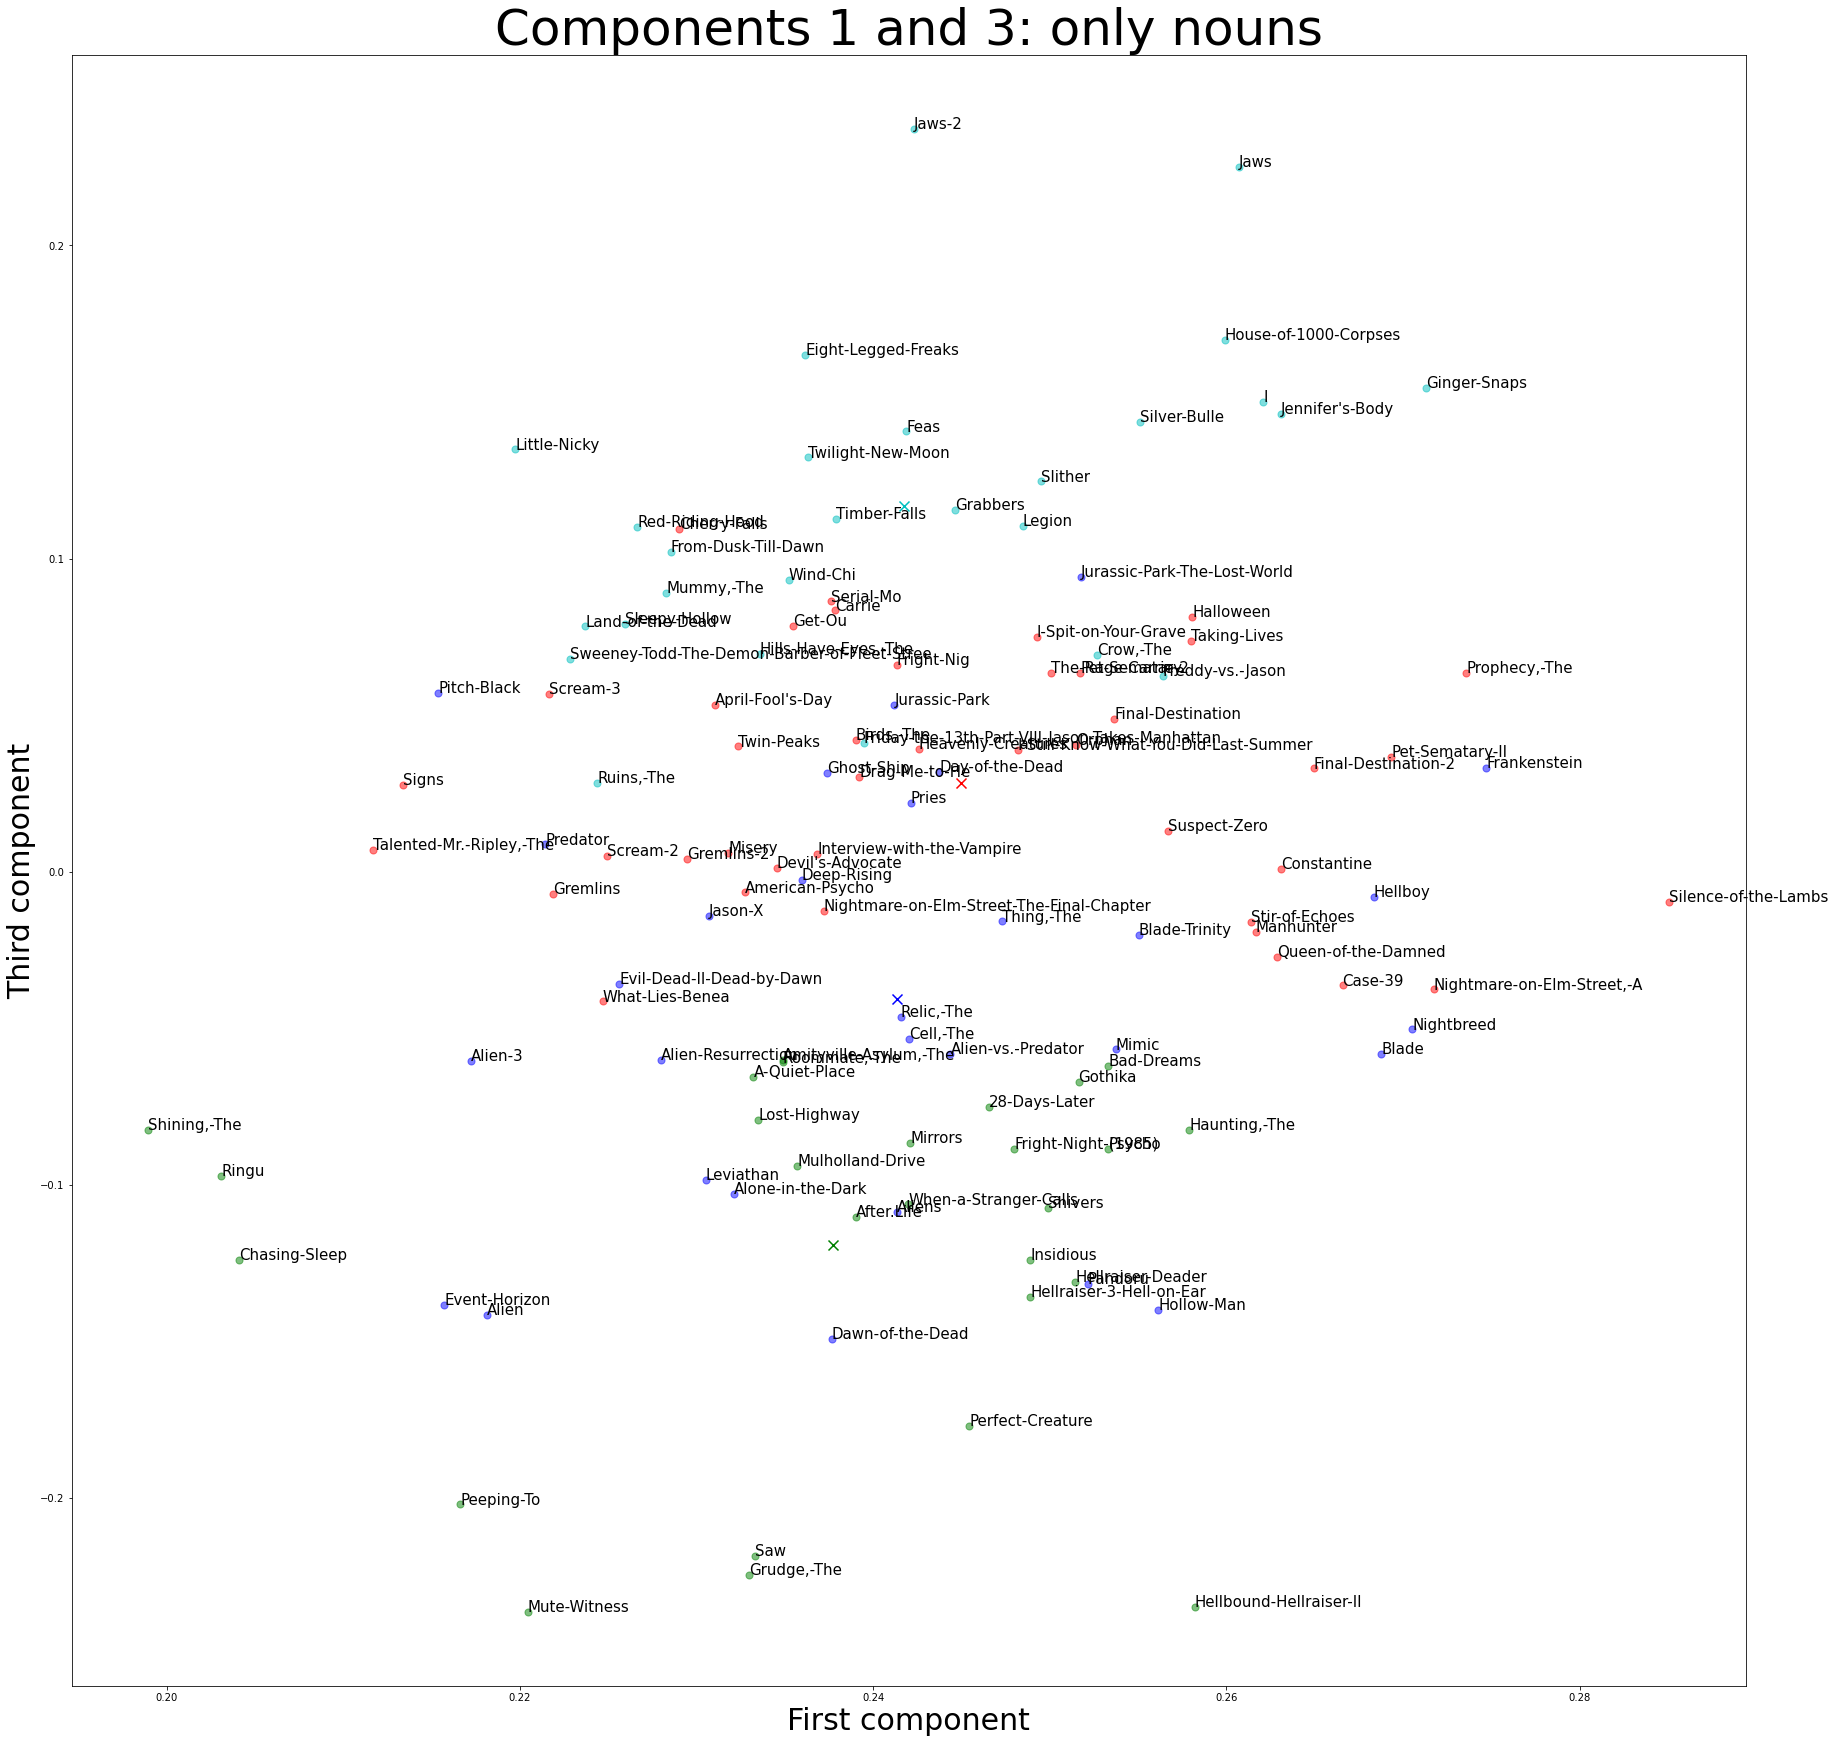

In [347]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(svd_nouns_matrix)  # svd_matrix or nmf_matrix

plt.figure(figsize = [30, 30])

display_cluster_first_third(svd_nouns_matrix,km,num_clusters)
plt.xlabel('First component', size = 30)
plt.ylabel('Third component', size = 30)
plt.title('Components 1 and 3: only nouns', size=50)
for i in range(svd_doc_component_nouns_df.shape[0]):
    plt.text(svd_doc_component_nouns_df.iloc[i,0], svd_doc_component_nouns_df.iloc[i,2], str(svd_doc_component_nouns_df.index[i]), size = 15)

Takeaways: topics 2 and 3 appear to separate samples the best.

Visualizing top words - nouns

In [329]:
print('Tope words for each component - only nouns\n')
print('topic 1: {}\n'.format(top_words(svd_word_component_nouns_df, 'Topic_1', 20)))

print('topic 2: {}\n'.format(top_words(svd_word_component_nouns_df, 'Topic_2', 20)))

print('topic 3: {}'.format(top_words(svd_word_component_nouns_df, 'Topic_3', 20)))


Tope words for each component - only nouns

topic 1: ['everybody home' 'icebox' 'theshe' 'eye blink' 'weapon hanging'
 'world seen' 'old file' 'discovered' 'yelling lung' 'beautifully dressed'
 'tattoo come' 'imitates' 'attacking' 'fluttering' 'door puzzled'
 'water hears' 'ax wall' 'yeah nice' 'told thing' 'tot']

topic 2: ['discovering' 'swear god' 'absent' 'face mind' 'body work' 'eye playing'
 'swivelling' 'kiss good' 'electric chair' 'fucking truck' 'floor group'
 'burn finger' 'button shirt' 'swear going' 'discombobulated' 'foot jump'
 'tilling' 'chalkboard' 'wall car' 'table talking']

topic 3: ['young teacher' 'casting' 'device saw' 'disbelievingly' 'cell looking'
 'decomposing dead' 'believe kid' 'come beat' 'card man'
 'coughing gasping' 'freshon' 'bed shaking' 'wanted want' 'fresh grave'
 'wait leave' 'buy cup' 'thisis' 'god secret' 'camera black'
 'thread needle']


## Dimensionality reduction with tSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)


## Word2Vec

In [18]:
import multiprocessing

from gensim.models import Word2Vec
import gensim.downloader
from gensim.test.utils import datapath



2020-11-07 11:33:21,858 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-11-07 11:33:21,859 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


In [19]:
cores = multiprocessing.cpu_count()
cores

8

In [172]:
df.head()

,names,texts,tokens,tokens_nouns,token_strings,token_nouns_strings
3,Dawn-of-the-Dead,\nDAWN OF\nTHE DEAD\n(The working draft 1977)\...,"[working, draft, george, romero, face, young, ...","[draft, george, romero, face, woman, credit, w...",working draft george romero face young woman a...,draft george romero face woman credit woman fa...
5,Gremlins-2,\n \n \n ...,"[written, charlie, haas, revised, crowded, chi...","[charlie, haas, street, rand, peltzer, mogwai,...",written charlie haas revised crowded chinatown...,charlie haas street rand peltzer mogwai stair ...
6,Mulholland-Drive,\n\n\n\nMulholland Drive Screenplay\n\n\n\n\t\...,"[mulholland, drive, screenplay, u, l, h, l, l,...","[mulholland, drive, screenplay, l, h, l, r, e,...",mulholland drive screenplay u l h l l n r v e ...,mulholland drive screenplay l h l r e l hl r e...
7,What-Lies-Benea,\n\n\n WHAT LIES BENEATH\...,"[clark, gregg, june, moving, murky, hazedark, ...","[clark, gregg, june, hazedark, blue, green, sh...",clark gregg june moving murky hazedark blue gr...,clark gregg june hazedark blue green shaft pur...
8,House-of-1000-Corpses,"\n ""HOUSE OF 1...","[written, r, w, zombie, revised, adancing, aro...","[r, w, zombie, movie, monster, frame, barrel, ...",written r w zombie revised adancing around gra...,r w zombie movie monster frame barrel shotgun ...


Checking that noun token entries are shorter

In [ ]:
for i,j in list(zip(df.tokens, df.tokens_nouns)):
    print('Length of all tokens: {}, length of only noun tokens: {}'.format(len(i), len(j)))

### Initialize model

In [268]:
# w2v_model = gensim.downloader.load('word2vec-google-news-300')


w2v_model_nouns = Word2Vec(min_count=20, window=4, size=200, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=100, workers=cores-1)

w2v_model = Word2Vec(min_count=20, window=4, size=200, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=100, workers=cores-1)


In [ ]:
df.tokens.iloc[0][:100]

# df.tokens_nouns.iloc[0][:100]

### Build vocab

In [269]:
w2v_model.build_vocab(df.tokens, progress_per=10000)

w2v_model_nouns.build_vocab(df.tokens_nouns, progress_per=10000)


2020-11-08 10:45:15,912 : INFO : collecting all words and their counts
2020-11-08 10:45:15,913 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-08 10:45:16,117 : INFO : collected 69377 word types from a corpus of 1344537 raw words and 125 sentences
2020-11-08 10:45:16,118 : INFO : Loading a fresh vocabulary
2020-11-08 10:45:16,148 : INFO : effective_min_count=20 retains 6811 unique words (9% of original 69377, drops 62566)
2020-11-08 10:45:16,149 : INFO : effective_min_count=20 leaves 1192813 word corpus (88% of original 1344537, drops 151724)
2020-11-08 10:45:16,169 : INFO : deleting the raw counts dictionary of 69377 items
2020-11-08 10:45:16,171 : INFO : sample=6e-05 downsamples 1331 most-common words
2020-11-08 10:45:16,171 : INFO : downsampling leaves estimated 675604 word corpus (56.6% of prior 1192813)
2020-11-08 10:45:16,186 : INFO : estimated required memory for 6811 words and 200 dimensions: 14303100 bytes
2020-11-08 10:45:16,187 : INFO : res

### Train model

In [ ]:
# w2v_model.train(df.tokens, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

w2v_model_nouns.train(df.tokens_nouns, total_examples=w2v_model_nouns.corpus_count, epochs=30, report_delay=1)

In [272]:
# w2v_model.wv.most_similar(positive=["zombie"], topn=15)

w2v_model_nouns.wv.most_similar(positive=["zombie"], topn=15)


2020-11-08 10:48:25,664 : INFO : precomputing L2-norms of word weight vectors


[('concourse', 0.8099330067634583),
 ('roger', 0.7965648174285889),
 ('raider', 0.7458820343017578),
 ('steve', 0.6942824125289917),
 ('escalator', 0.6910529136657715),
 ('ghoul', 0.6899268627166748),
 ('mall', 0.6803348064422607),
 ('fran', 0.6588757038116455),
 ('trooper', 0.6409854888916016),
 ('gunfire', 0.6388310790061951),
 ('creature', 0.5912205576896667),
 ('stephen', 0.5818443894386292),
 ('footing', 0.5803243517875671),
 ('bikers', 0.5786666870117188),
 ('gate', 0.5705846548080444)]

### Visualize W2V with tSNE

In [138]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 200), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [ ]:
w2v_model_nouns.wv.__getitem__(['zombie'])

In [274]:
[i[0] for i in w2v_model_nouns.wv.most_similar(negative=["zombie"])]

['headache',
 'nightmare',
 'kettle',
 'madison',
 'well',
 'mind',
 'pan',
 'creepy',
 'explanation',
 'tonight']

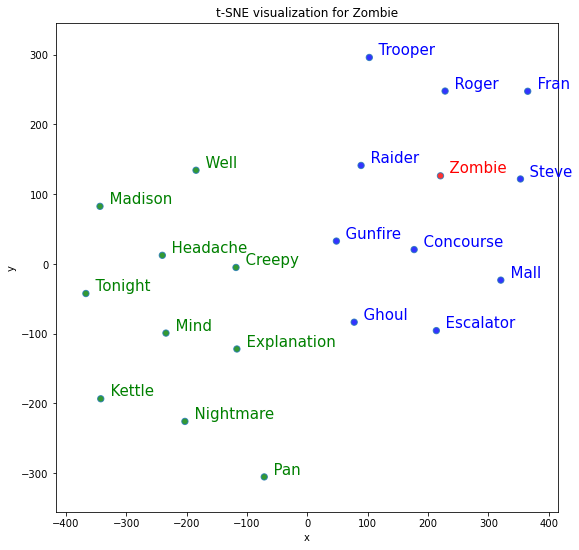

In [275]:
# tsnescatterplot(w2v_model, 'zombie', [i[0] for i in w2v_model.wv.most_similar(negative=["zombie"])])

tsnescatterplot(w2v_model_nouns, 'zombie', [i[0] for i in w2v_model_nouns.wv.most_similar(negative=["zombie"])])



## Plotting top words in SVD with tSNE

What are the top words?

In [316]:
print('topic 1: {}\n'.format(top_words(svd_word_component_df, 'Topic_1', 10)))

print('topic 2: {}\n'.format(top_words(svd_word_component_df, 'Topic_2', 10)))

print('topic 3: {}'.format(top_words(svd_word_component_df, 'Topic_3', 10)))


topic 1: ['maybe' 'new' 'lost' 'past' 'year' 'said' 'saw' 'really' 'change'
 'taking']

topic 2: ['genre action' 'sci' 'sci fi' 'horror sci' 'fi' 'action horror' 'seal'
 'fi thriller' 'cargo' 'hull']

topic 3: ['torment' 'shall' 'beautifully' 'suffering' 'candlelight' 'pity'
 'stone wall' 'glittering' 'bowed' 'girl stare']


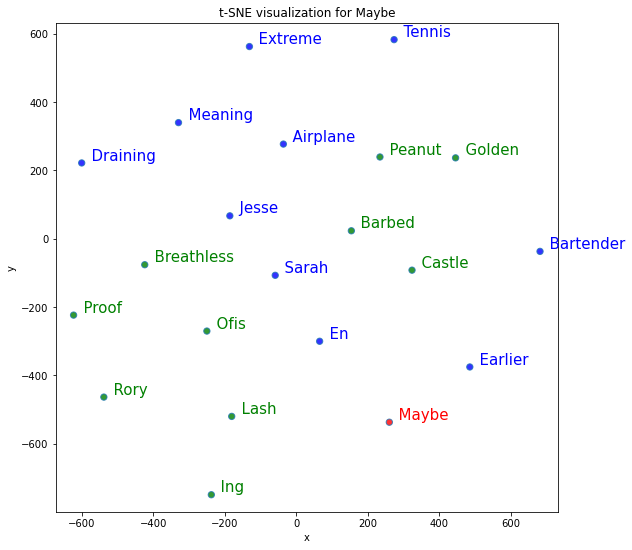

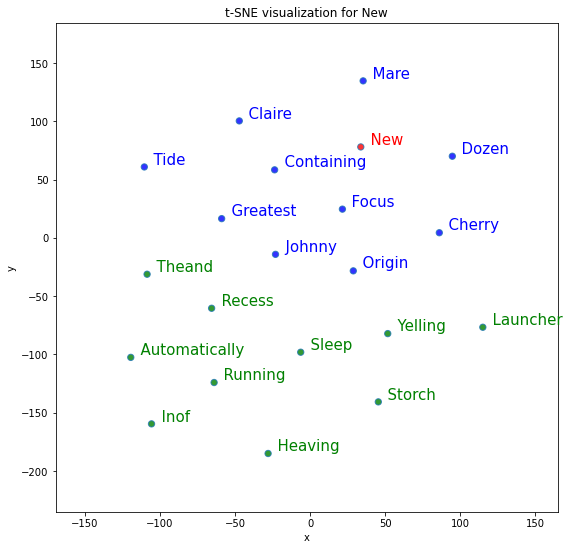

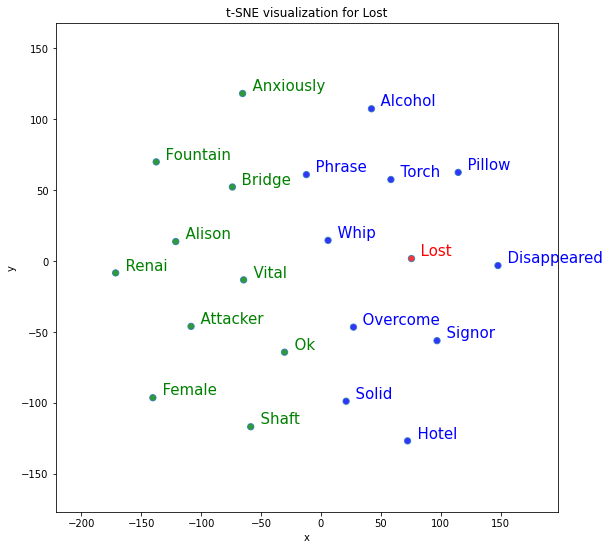

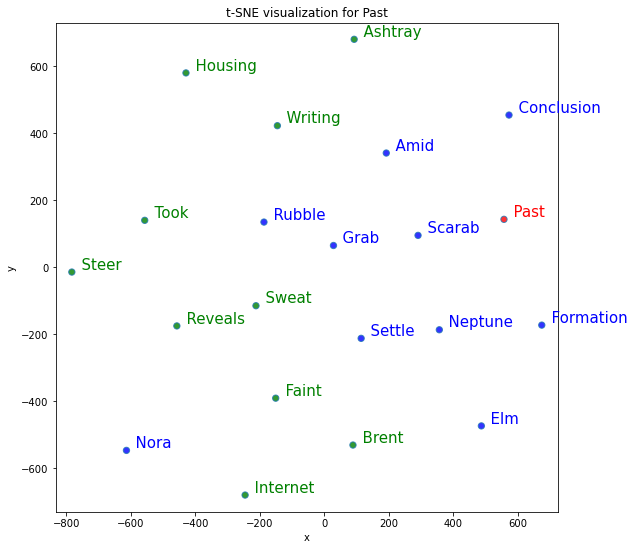

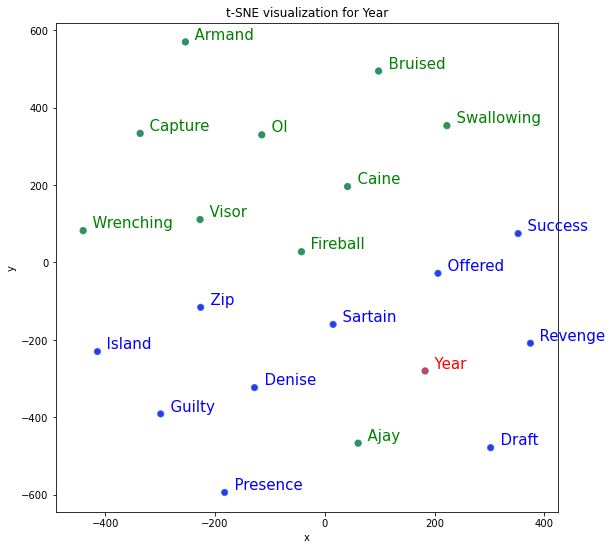

In [348]:
for word in top_words(svd_word_component_df, 'Topic_1', 5):
    tsnescatterplot(w2v_model, word, [i[0] for i in w2v_model.wv.most_similar(negative=[word])])


# Nouns
# for word in top_words(svd_word_component_nouns_df, 'Topic_1', 10):
# #     print(word)
# #     print(w2v_model_nouns.wv.most_similar(negative=[word]))
    
#     try: tsnescatterplot(w2v_model_nouns, word, [i[0] for i in w2v_model_nouns.wv.most_similar(negative=[word])])
#     except: print('"{}" not in vocab'.format(word))
    
### not working with only nouns??

In [277]:
top_words(svd_word_component_nouns_df, 'Topic_1', 10)

array(['everybody home', 'icebox', 'theshe', 'eye blink',
       'weapon hanging', 'world seen', 'old file', 'discovered',
       'yelling lung', 'beautifully dressed'], dtype=object)

Note: this notebook features exploratory modeling. For final vectorization and modeling, see "Modeling_workflow_final" notebook.